In [1]:
## Three Phases in one person lifecyle
## Good - Bad - Churn
## Applicable universely

# <font color=Red>Telecom Churn Case Study - MLC23</font>
-------
 - Alka Pandey
 - Karandeep Singh Dhillon
-------

---------------------
## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

--------------

-------------------
## Definitions of Churn

There are various ways to define churn, such as:

1. **Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

2. **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

**In this project, you will use the usage-based definition to define churn.**


--------------------

## Process

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#data_dict = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
df = pd.read_csv('telecom_churn_data.csv')

In [5]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Data Prep



**1. Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

 

**2. Filter high-value customers**

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 29.9k rows.

 

**3. Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

1. Mobile No : <font color='red'> Not useful for analysis as its different for every person </font>
2. Circle ID : <font color='green'> Can be usefull if there is large scale migration of customers from a particular region. For eg people are porting from jio due to farmers bills </font>
3. LOC,STD,IC,OG,T2T,T2M,T20,T2F,T2C : <font color='green'> Can be correleated to churning </font>
4. ARPU: <font color='green'> This is imp factor </font>

In [6]:
## Data Cleaning

In [7]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [8]:
# Rename month named vbc columns to format 6,7,8 and 9
df.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [9]:
##Dropping column of 0 variance and also mobile number which has no usage
df.drop(columns=['circle_id','mobile_number'],inplace=True)

In [10]:
##Print null values in each column
print(df.isnull().sum())

loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
                        ... 
aon                        0
vbc_3g_8                   0
vbc_3g_7                   0
vbc_3g_6                   0
vbc_3g_9                   0
Length: 224, dtype: int64


In [11]:
##Percent Null in each column
print(100*df.isnull().sum()/len(df))

loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
                          ...   
aon                     0.000000
vbc_3g_8                0.000000
vbc_3g_7                0.000000
vbc_3g_6                0.000000
vbc_3g_9                0.000000
Length: 224, dtype: float64


In [12]:
df[['total_rech_amt_6','total_rech_amt_7','total_rech_num_6','total_rech_num_7']].isnull().sum()/len(df)

total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_num_6    0.0
total_rech_num_7    0.0
dtype: float64

In [13]:
print("------Null Percent-----")
for col in df.columns:
    if 'rech' in col:
        percent = df[col].isnull().sum()/len(df)
        print("{}: {}%".format(col,100*percent))

------Null Percent-----
total_rech_num_6: 0.0%
total_rech_num_7: 0.0%
total_rech_num_8: 0.0%
total_rech_num_9: 0.0%
total_rech_amt_6: 0.0%
total_rech_amt_7: 0.0%
total_rech_amt_8: 0.0%
total_rech_amt_9: 0.0%
max_rech_amt_6: 0.0%
max_rech_amt_7: 0.0%
max_rech_amt_8: 0.0%
max_rech_amt_9: 0.0%
date_of_last_rech_6: 1.6070160701607015%
date_of_last_rech_7: 1.767017670176702%
date_of_last_rech_8: 3.6220362203622036%
date_of_last_rech_9: 4.760047600476005%
date_of_last_rech_data_6: 74.84674846748467%
date_of_last_rech_data_7: 74.42874428744287%
date_of_last_rech_data_8: 73.66073660736608%
date_of_last_rech_data_9: 74.07774077740777%
total_rech_data_6: 74.84674846748467%
total_rech_data_7: 74.42874428744287%
total_rech_data_8: 73.66073660736608%
total_rech_data_9: 74.07774077740777%
max_rech_data_6: 74.84674846748467%
max_rech_data_7: 74.42874428744287%
max_rech_data_8: 73.66073660736608%
max_rech_data_9: 74.07774077740777%
count_rech_2g_6: 74.84674846748467%
count_rech_2g_7: 74.42874428744287

In [14]:
df[['total_rech_data_6','date_of_last_rech_data_6','max_rech_data_6','count_rech_2g_6','av_rech_amt_data_6','count_rech_3g_6']]

,total_rech_data_6,date_of_last_rech_data_6,max_rech_data_6,count_rech_2g_6,av_rech_amt_data_6,count_rech_3g_6
0,1.0,6/21/2014,252.0,0.0,252.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,6/4/2014,56.0,1.0,56.0,0.0
...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,6/13/2014,25.0,2.0,39.0,0.0
99997,3.0,6/17/2014,202.0,1.0,583.0,2.0


### Counting null values in each column and driving insights

In [15]:
print("{} {} {}".format(df.max_rech_data_6.isnull().sum(),df.av_rech_amt_data_6.isnull().sum(),df.date_of_last_rech_data_6.isnull().sum()))
print("{} {} {}".format(df.max_rech_data_7.isnull().sum(),df.av_rech_amt_data_7.isnull().sum(),df.date_of_last_rech_data_7.isnull().sum()))
print("{} {} {}".format(df.max_rech_data_8.isnull().sum(),df.av_rech_amt_data_8.isnull().sum(),df.date_of_last_rech_data_8.isnull().sum()))

##As null values are increasing every month, its a clear indication that these users are churning

74846 74846 74846
74428 74428 74428
73660 73660 73660


In [16]:
## We can see that if a customer has not recharged his mobile in a particular month then his total_rech_data_ and date_of_last_rech is NaN
## We can impute this with 0

months = [6,7,8,9]

for month in months:
    col1 = 'total_rech_data_{}'.format(month)
    col2 = 'date_of_last_rech_data_{}'.format(month)
    col3 = 'max_rech_data_{}'.format(month)
    col4 = 'av_rech_amt_data_{}'.format(month)
    if(df[col1].isnull().equals(df[col2].isnull())):
        print('Imputing')
        df[col1].fillna(0,inplace=True)
        df[col2].fillna(0,inplace=True)
        df[col3].fillna(0,inplace=True)
        df[col4].fillna(0,inplace=True)

Imputing
Imputing
Imputing
Imputing


In [17]:
print("------Null Percent-----")
for col in df.columns:
    if 'rech' in col:
        percent = df[col].isnull().sum()/len(df)
        print("{}: {}%".format(col,100*percent))

------Null Percent-----
total_rech_num_6: 0.0%
total_rech_num_7: 0.0%
total_rech_num_8: 0.0%
total_rech_num_9: 0.0%
total_rech_amt_6: 0.0%
total_rech_amt_7: 0.0%
total_rech_amt_8: 0.0%
total_rech_amt_9: 0.0%
max_rech_amt_6: 0.0%
max_rech_amt_7: 0.0%
max_rech_amt_8: 0.0%
max_rech_amt_9: 0.0%
date_of_last_rech_6: 1.6070160701607015%
date_of_last_rech_7: 1.767017670176702%
date_of_last_rech_8: 3.6220362203622036%
date_of_last_rech_9: 4.760047600476005%
date_of_last_rech_data_6: 0.0%
date_of_last_rech_data_7: 0.0%
date_of_last_rech_data_8: 0.0%
date_of_last_rech_data_9: 0.0%
total_rech_data_6: 0.0%
total_rech_data_7: 0.0%
total_rech_data_8: 0.0%
total_rech_data_9: 0.0%
max_rech_data_6: 0.0%
max_rech_data_7: 0.0%
max_rech_data_8: 0.0%
max_rech_data_9: 0.0%
count_rech_2g_6: 74.84674846748467%
count_rech_2g_7: 74.42874428744287%
count_rech_2g_8: 73.66073660736608%
count_rech_2g_9: 74.07774077740777%
count_rech_3g_6: 74.84674846748467%
count_rech_3g_7: 74.42874428744287%
count_rech_3g_8: 73.66

## Derived Columns
If customer data usage consumption is decreasing in every month, its can indicate that he will churn

In [18]:
df['consumption_decreased_from_6_7'] = 0
df.loc[df.av_rech_amt_data_6 > df.av_rech_amt_data_7,'consumption_decreased_from_6_7']=1

<AxesSubplot:>

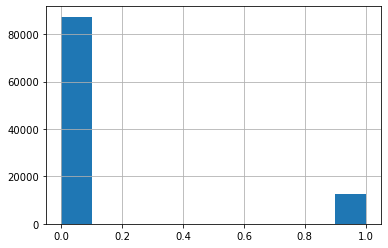

In [19]:
df.consumption_decreased_from_6_7.hist()

In [20]:
df['consumption_decreased_from_7_8'] = 0
df.loc[df.av_rech_amt_data_7 > df.av_rech_amt_data_8,'consumption_decreased_from_7_8']=1

<AxesSubplot:>

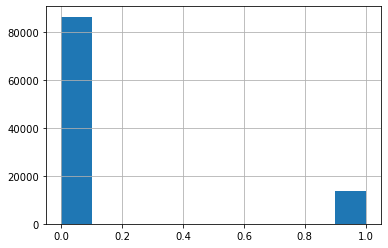

In [21]:
df.consumption_decreased_from_7_8.hist()

In [22]:
## Deriving New columns
df['avg_rech_amt_data_6_7']=(df['av_rech_amt_data_6'] + df['av_rech_amt_data_7'])/2
df['avg_rech_amt_data_7_8']=(df['av_rech_amt_data_7'] + df['av_rech_amt_data_8'])/2
df['avg_rech_amt_data_6_7_8_change']= df['avg_rech_amt_data_7_8'] - df['avg_rech_amt_data_6_7']

In [23]:
df['avg_rech_amt_data_6_7_8_change']

0         0.0
1        25.0
2         0.0
3         0.0
4       -28.0
         ... 
99994     0.0
99995     0.0
99996   -19.5
99997    66.5
99998   -77.0
Name: avg_rech_amt_data_6_7_8_change, Length: 99999, dtype: float64

-------------------
## High-value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, we will define **high-value customers** and **predict churn only on high-value customers.**

---------------------

We need to predict churn only for the high-value customers. High-value customers are Those who have recharged with an amount more than or equal to X, where X is the **70th percentile of the average recharge amount in the first two months (the good phase).**



In [24]:
##Earnings from data
df['total_earning_data_rech_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_earning_data_rech_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_earning_data_rech_8'] = df['total_rech_data_8']*df['av_rech_amt_data_8']
df['total_earning_data_rech_9'] = df['total_rech_data_9']*df['av_rech_amt_data_9']

In [25]:
##Total earning per month
df['total_earning_6'] = df['total_earning_data_rech_6'] + df['total_rech_amt_6']
df['total_earning_7'] = df['total_earning_data_rech_7'] + df['total_rech_amt_7']
df['total_earning_8'] = df['total_earning_data_rech_8'] + df['total_rech_amt_8']
df['total_earning_9'] = df['total_earning_data_rech_9'] + df['total_rech_amt_9']

In [26]:
##Avg earning for june july
df['avg_earning_6_7'] = (df['total_earning_6'] + df['total_earning_7'])/2

In [27]:
df['avg_earning_6_7'].describe(percentiles=[.70])


count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: avg_earning_6_7, dtype: float64

In [28]:
high_value_good_customers = df.loc[df['avg_earning_6_7'] >= df['avg_earning_6_7'].quantile(0.7)]
print(high_value_good_customers.shape)

(30001, 238)


In [29]:
high_value_good_customers.reset_index(drop=True,inplace=True)
high_value_good_customers.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,...,avg_rech_amt_data_6_7_8_change,total_earning_data_rech_6,total_earning_data_rech_7,total_earning_data_rech_8,total_earning_data_rech_9,total_earning_6,total_earning_7,total_earning_8,total_earning_9,avg_earning_6_7
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,...,0.0,252.0,252.0,252.0,0.0,614.0,504.0,504.0,0.0,559.0
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,...,0.0,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,0.0,1185.0
2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,...,34.5,0.0,354.0,207.0,0.0,437.0,955.0,327.0,186.0,696.0
3,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,...,0.0,0.0,0.0,0.0,0.0,600.0,680.0,718.0,680.0,640.0
4,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,...,135.0,0.0,712.0,540.0,252.0,0.0,1166.0,979.0,504.0,583.0


**Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:**
- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [30]:
##Tag churners
high_value_good_customers['churners'] = 0
churn_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
high_value_good_customers.loc[(high_value_good_customers[churn_cols[0]] == 0) & (high_value_good_customers[churn_cols[1]] == 0) & (high_value_good_customers[churn_cols[2]] == 0) & (high_value_good_customers[churn_cols[3]] == 0),'churners']=1


<ipython-input-30-ba6a4f1e753c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_good_customers['churners'] = 0
C:\Users\alkap\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
high_value_good_customers.churners.sum()/len(high_value_good_customers) *100

8.136395453484884

The business objective is to predict the churn in the **last (i.e. the ninth) month** using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.



### Dropping 9th month columns

In [32]:
month_df_cols = [col for col in high_value_good_customers.columns if '9' in col]
high_value_good_customers = high_value_good_customers.drop(month_df_cols,axis=1)

### Remove Zero Variance columns

In [33]:
zero_variance_columns = []

for c in high_value_good_customers.columns:
    print ("---- {} ---".format(c))
    print (high_value_good_customers[c].value_counts())
    print ((high_value_good_customers[c].nunique()),'len')
    if (high_value_good_customers[c].nunique()) <= 1:
        zero_variance_columns.append(c)

---- loc_og_t2o_mou ---
0.0    29777
Name: loc_og_t2o_mou, dtype: int64
1 len
---- std_og_t2o_mou ---
0.0    29777
Name: std_og_t2o_mou, dtype: int64
1 len
---- loc_ic_t2o_mou ---
0.0    29777
Name: loc_ic_t2o_mou, dtype: int64
1 len
---- last_date_of_month_6 ---
6/30/2014    30001
Name: last_date_of_month_6, dtype: int64
1 len
---- last_date_of_month_7 ---
7/31/2014    29974
Name: last_date_of_month_7, dtype: int64
1 len
---- last_date_of_month_8 ---
8/31/2014    29836
Name: last_date_of_month_8, dtype: int64
1 len
---- arpu_6 ---
0.000      227
213.821     18
213.822     17
213.818     16
213.815     14
          ... 
437.577      1
404.898      1
566.285      1
108.260      1
337.604      1
Name: arpu_6, Length: 29072, dtype: int64
29072 len
---- arpu_7 ---
0.000       223
213.795      19
213.808      15
213.814      13
213.816      13
           ... 
373.537       1
2210.547      1
334.576       1
670.848       1
469.810       1
Name: arpu_7, Length: 29084, dtype: int64
29084 len
-

Name: std_og_t2t_mou_6, Length: 11102, dtype: int64
11102 len
---- std_og_t2t_mou_7 ---
0.00       12758
0.33          26
0.31          24
0.80          23
0.36          22
           ...  
447.84         1
232.94         1
116.53         1
2056.08        1
762.18         1
Name: std_og_t2t_mou_7, Length: 11254, dtype: int64
11254 len
---- std_og_t2t_mou_8 ---
0.00       13297
0.50          30
0.63          21
0.70          20
0.60          20
           ...  
248.69         1
1981.78        1
661.83         1
14.20          1
581.99         1
Name: std_og_t2t_mou_8, Length: 10251, dtype: int64
10251 len
---- std_og_t2m_mou_6 ---
0.00       8274
0.76         30
0.56         28
0.36         28
0.40         27
           ... 
399.18        1
152.71        1
231.01        1
49.83         1
1366.68       1
Name: std_og_t2m_mou_6, Length: 12875, dtype: int64
12875 len
---- std_og_t2m_mou_7 ---
0.00       8559
1.01         30
0.31         29
0.33         27
0.35         27
           ... 
95

---- std_ic_t2f_mou_6 ---
0.00      21793
0.20         65
0.31         64
0.56         60
0.43         59
          ...  
16.24         1
445.51        1
33.48         1
22.36         1
23.81         1
Name: std_ic_t2f_mou_6, Length: 1959, dtype: int64
1959 len
---- std_ic_t2f_mou_7 ---
0.00      21610
0.48         64
0.33         59
0.26         58
0.23         57
          ...  
70.89         1
108.63        1
15.56         1
13.39         1
55.63         1
Name: std_ic_t2f_mou_7, Length: 2019, dtype: int64
2019 len
---- std_ic_t2f_mou_8 ---
0.00      21248
0.33         68
0.36         58
0.41         53
0.51         51
          ...  
15.89         1
32.53         1
159.16        1
19.98         1
45.41         1
Name: std_ic_t2f_mou_8, Length: 1891, dtype: int64
1891 len
---- std_ic_t2o_mou_6 ---
0.0    29456
Name: std_ic_t2o_mou_6, dtype: int64
1 len
---- std_ic_t2o_mou_7 ---
0.0    29464
Name: std_ic_t2o_mou_7, dtype: int64
1 len
---- std_ic_t2o_mou_8 ---
0.0    28827
Name: std_i

Name: total_rech_data_8, dtype: int64
47 len
---- max_rech_data_6 ---
0.0       13245
154.0      3102
25.0       2983
252.0      2809
198.0       942
98.0        873
23.0        850
152.0       844
145.0       669
17.0        508
179.0       399
41.0        342
91.0        320
46.0        251
56.0        196
14.0        194
455.0       186
202.0       143
177.0       139
274.0       136
49.0        126
33.0         98
655.0        96
149.0        95
125.0        88
505.0        74
8.0          65
449.0        50
755.0        30
951.0        27
29.0         24
101.0        20
855.0        12
22.0          9
1555.0        9
1.0           8
52.0          7
13.0          7
48.0          6
5.0           5
15.0          3
1255.0        3
61.0          2
295.0         2
9.0           1
995.0         1
1505.0        1
495.0         1
Name: max_rech_data_6, dtype: int64
48 len
---- max_rech_data_7 ---
0.0       12944
154.0      3029
25.0       2969
252.0      2908
198.0      1119
23.0        97

Name: arpu_2g_7, Length: 5420, dtype: int64
5420 len
---- arpu_2g_8 ---
0.00      4458
212.17    1080
0.01       291
424.34     272
150.67     262
          ... 
49.67        1
92.00        1
7.25         1
17.50        1
501.64       1
Name: arpu_2g_8, Length: 4778, dtype: int64
4778 len
---- night_pck_user_6 ---
0.0    16349
1.0      407
Name: night_pck_user_6, dtype: int64
2 len
---- night_pck_user_7 ---
0.0    16682
1.0      375
Name: night_pck_user_7, dtype: int64
2 len
---- night_pck_user_8 ---
0.0    15612
1.0      341
Name: night_pck_user_8, dtype: int64
2 len
---- monthly_2g_6 ---
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64
5 len
---- monthly_2g_7 ---
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
6 len
---- monthly_2g_8 ---
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64
6 len
---- sachet_2g_6 ---
0     21256
1      3100
2      150

In [34]:
## Removing columns which have only one value
print(zero_variance_columns)
high_value_good_customers = high_value_good_customers.drop(zero_variance_columns,axis=1)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


### Checking null values in each column

In [36]:
##Checking null values in each month
months = [6,7,8]
threshold = 40
high_null_columns = []
for month in months:
    month_df_cols = [col for col in high_value_good_customers.columns if str(month) in col]
    month_df = high_value_good_customers[month_df_cols]
    print("--Month {}--".format(month))
    percent_null = (round((month_df.isnull().sum(axis=0)/len(month_df)) * 100,2))
    for i,col in enumerate(month_df_cols):
        print(col,percent_null[i])
        if percent_null[i]> threshold:
            print('^^^^^^^^^^^')
            high_null_columns.append(col)

--Month 6--
arpu_6 0.0
onnet_mou_6 1.82
offnet_mou_6 1.82
roam_ic_mou_6 1.82
roam_og_mou_6 1.82
loc_og_t2t_mou_6 1.82
loc_og_t2m_mou_6 1.82
loc_og_t2f_mou_6 1.82
loc_og_t2c_mou_6 1.82
loc_og_mou_6 1.82
std_og_t2t_mou_6 1.82
std_og_t2m_mou_6 1.82
std_og_t2f_mou_6 1.82
std_og_mou_6 1.82
isd_og_mou_6 1.82
spl_og_mou_6 1.82
og_others_6 1.82
total_og_mou_6 0.0
loc_ic_t2t_mou_6 1.82
loc_ic_t2m_mou_6 1.82
loc_ic_t2f_mou_6 1.82
loc_ic_mou_6 1.82
std_ic_t2t_mou_6 1.82
std_ic_t2m_mou_6 1.82
std_ic_t2f_mou_6 1.82
std_ic_mou_6 1.82
total_ic_mou_6 0.0
spl_ic_mou_6 1.82
isd_ic_mou_6 1.82
ic_others_6 1.82
total_rech_num_6 0.0
total_rech_amt_6 0.0
max_rech_amt_6 0.0
date_of_last_rech_6 0.24
last_day_rch_amt_6 0.0
date_of_last_rech_data_6 0.0
total_rech_data_6 0.0
max_rech_data_6 0.0
count_rech_2g_6 44.15
^^^^^^^^^^^
count_rech_3g_6 44.15
^^^^^^^^^^^
av_rech_amt_data_6 0.0
vol_2g_mb_6 0.0
vol_3g_mb_6 0.0
arpu_3g_6 44.15
^^^^^^^^^^^
arpu_2g_6 44.15
^^^^^^^^^^^
night_pck_user_6 44.15
^^^^^^^^^^^
monthly_

In [37]:
high_value_good_customers[(high_null_columns)].describe()

,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,count_rech_2g_7,count_rech_3g_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7,count_rech_2g_8,count_rech_3g_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
count,16756.000000,16756.000000,16756.000000,16756.000000,16756.000000,16756.000000,17057.000000,17057.000000,17057.000000,17057.000000,17057.000000,17057.000000,15953.000000,15953.000000,15953.000000,15953.000000,15953.000000,15953.000000
mean,2.221175,0.764801,119.974696,113.585859,0.024290,0.926534,2.457642,0.802955,120.695809,113.801227,0.021985,0.921733,2.272676,0.777471,118.050972,109.817427,0.021375,0.897198
std,3.005300,1.477739,226.092738,201.792701,0.153952,0.260908,3.235315,1.617808,229.575385,206.066861,0.146639,0.268599,3.112685,1.667737,218.941369,195.348610,0.144636,0.303710
min,0.000000,0.000000,-30.280000,-15.320000,0.000000,0.000000,0.000000,0.000000,-26.040000,-15.480000,0.000000,0.000000,0.000000,0.000000,-24.490000,-24.430000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,15.480000,26.915000,0.000000,1.000000,1.000000,0.000000,12.950000,24.000000,0.000000,1.000000,1.000000,0.000000,10.020000,19.900000,0.000000,1.000000
75%,3.000000,1.000000,177.787500,168.517500,0.000000,1.000000,3.000000,1.000000,180.040000,166.910000,0.000000,1.000000,3.000000,1.000000,179.490000,157.190000,0.000000,1.000000
max,42.000000,29.000000,6362.280000,6433.760000,1.000000,1.000000,48.000000,35.000000,4980.900000,4809.360000,1.000000,1.000000,44.000000,45.000000,3716.900000,3467.170000,1.000000,1.000000


In [38]:
high_value_good_customers[(high_null_columns)].head(10)

,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,count_rech_2g_7,count_rech_3g_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,fb_user_7,count_rech_2g_8,count_rech_3g_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,fb_user_8
0,0.0,1.0,212.17,212.17,0.0,1.0,0.0,1.0,212.17,212.17,0.0,1.0,0.0,1.0,212.17,212.17,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.00,0.00,0.0,1.0,3.0,0.0,19.83,0.00,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,306.57,301.78,0.0,1.0,0.0,2.0,197.27,150.67,0.0,1.0
5,0.0,5.0,897.60,931.58,1.0,1.0,0.0,8.0,2294.03,2200.20,1.0,1.0,0.0,1.0,405.26,391.92,0.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,0.0,0.00,12.00,0.0,1.0,5.0,0.0,0.00,0.00,0.0,0.0,1.0,0.0,0.00,0.00,0.0,0.0


In [39]:
for c in high_null_columns:
    print ("---- {} ---".format(c))
    print (high_value_good_customers[c].value_counts(dropna=False))

---- count_rech_2g_6 ---
NaN     13245
1.0      5859
0.0      4310
2.0      2198
3.0      1061
4.0       776
5.0       567
6.0       457
7.0       357
8.0       287
9.0       237
10.0      196
11.0      125
12.0      111
13.0       51
14.0       46
15.0       27
17.0       19
16.0       16
18.0       13
19.0       12
22.0        7
20.0        7
21.0        5
24.0        3
25.0        3
32.0        1
34.0        1
39.0        1
30.0        1
28.0        1
42.0        1
Name: count_rech_2g_6, dtype: int64
---- count_rech_3g_6 ---
NaN     13245
0.0      9381
1.0      4911
2.0      1424
3.0       490
4.0       197
5.0       117
7.0        57
6.0        52
8.0        31
9.0        22
10.0       20
11.0       13
15.0        6
12.0        6
19.0        5
13.0        4
23.0        3
18.0        3
14.0        3
22.0        3
16.0        2
17.0        2
29.0        2
28.0        1
21.0        1
Name: count_rech_3g_6, dtype: int64
---- arpu_3g_6 ---
NaN       13245
0.00       6119
212.17      503

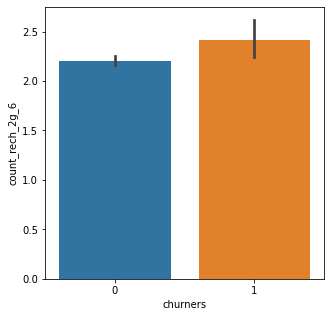

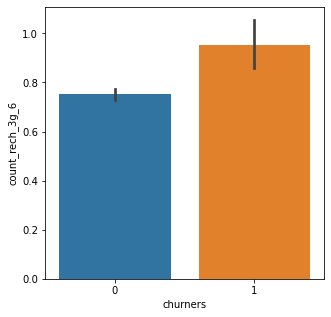

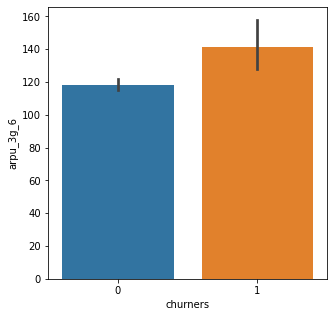

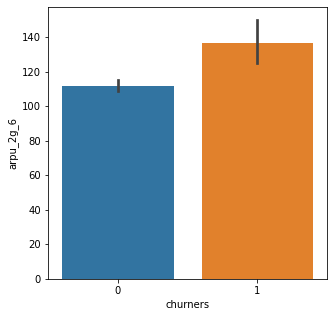

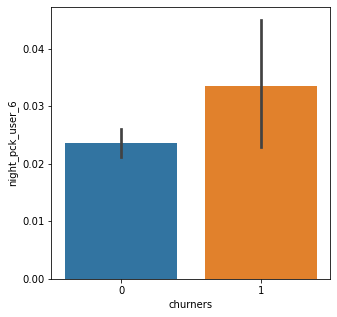

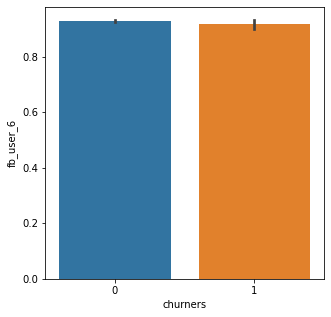

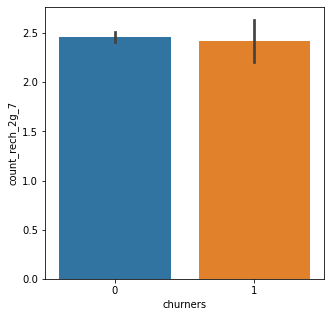

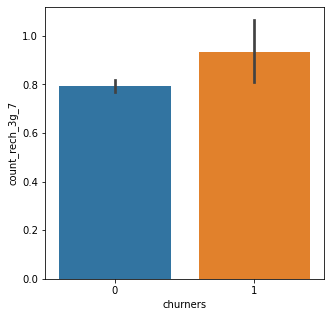

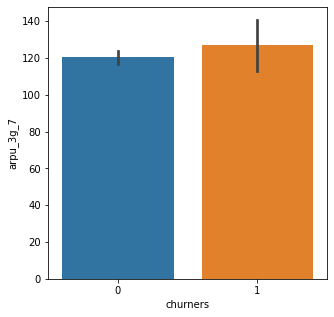

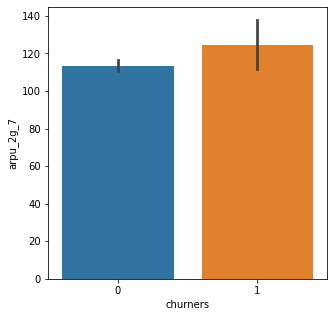

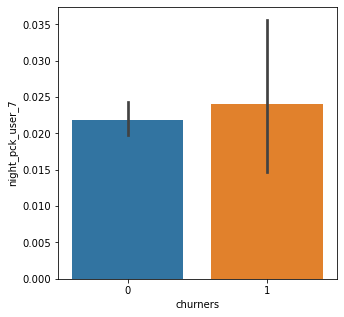

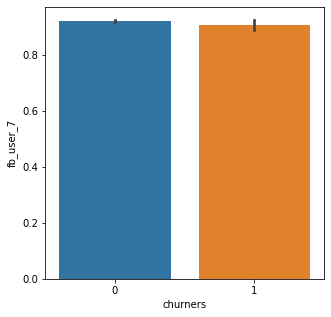

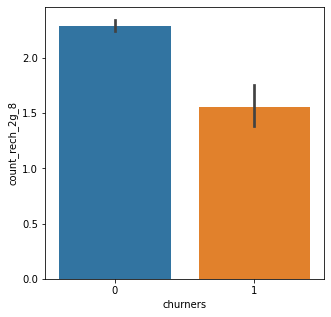

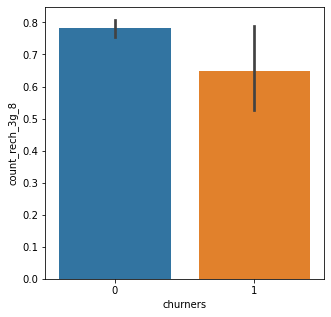

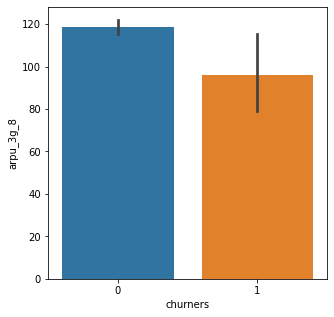

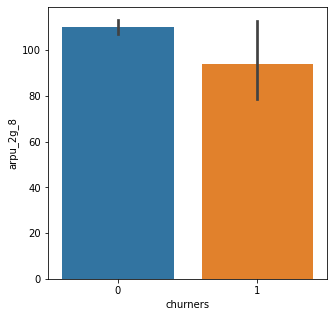

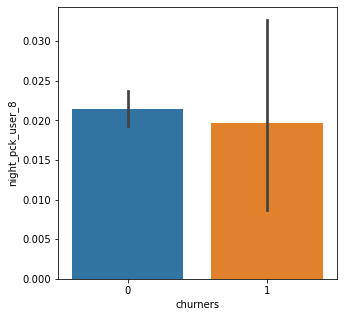

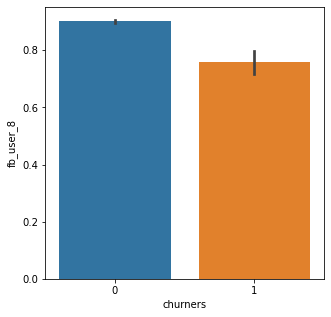

In [40]:
for c in high_null_columns:
    plt.figure(figsize=(5,5))
    sns.barplot(y=c,x='churners',data=high_value_good_customers)

In [41]:
high_null_columns

['count_rech_2g_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'fb_user_8']

### Checking why columns are null

In [42]:
# Month 6
months = [6,7,8]

for month in months:
    arpu_3g_null = high_value_good_customers['arpu_3g_{}'.format(month)].isnull()
    count_rech_2g_null = high_value_good_customers['count_rech_2g_{}'.format(month)].isnull()
    count_rech_3g_null = high_value_good_customers['count_rech_3g_{}'.format(month)].isnull()
    fb_user_null = high_value_good_customers['fb_user_{}'.format(month)].isnull()
    night_pck_user_null = high_value_good_customers['night_pck_user_{}'.format(month)].isnull()
    print(arpu_3g_null.sum(),count_rech_2g_null.sum(),count_rech_3g_null.sum(),fb_user_null.sum(),night_pck_user_null.sum())
    if arpu_3g_null.equals(count_rech_2g_null) & count_rech_2g_null.equals(count_rech_3g_null) & count_rech_3g_null.equals(fb_user_null) &  fb_user_null.equals(night_pck_user_null):
        print('The indexes for NULL values for month {} are equal'.format(month))

13245 13245 13245 13245 13245
The indexes for NULL values for month 6 are equal
12944 12944 12944 12944 12944
The indexes for NULL values for month 7 are equal
14048 14048 14048 14048 14048
The indexes for NULL values for month 8 are equal


### This means customer is not using any mobile data so he will also not use fb and other data services.We can impute these null values with 0.

In [43]:
cols = ['arpu_2g_6','arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8','count_rech_2g_6', 
        'count_rech_2g_7','count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8',  'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 
        'fb_user_6', 'fb_user_7', 'fb_user_8']

high_value_good_customers[cols] = high_value_good_customers[cols].fillna(0)

In [44]:
#Imputing Date Columns
'''
date_of_last_rech_data_6_mode = high_value_good_customers['date_of_last_rech_data_6'].mode()[0]
date_of_last_rech_data_7_mode = high_value_good_customers['date_of_last_rech_data_7'].mode()[0]
date_of_last_rech_data_8_mode = high_value_good_customers['date_of_last_rech_data_8'].mode()[0]
high_value_good_customers.date_of_last_rech_data_6.fillna(date_of_last_rech_data_6_mode, inplace=True)
high_value_good_customers.date_of_last_rech_data_7.fillna(date_of_last_rech_data_7_mode, inplace=True)
high_value_good_customers.date_of_last_rech_data_8.fillna(date_of_last_rech_data_8_mode, inplace=True)
'''

"\ndate_of_last_rech_data_6_mode = high_value_good_customers['date_of_last_rech_data_6'].mode()[0]\ndate_of_last_rech_data_7_mode = high_value_good_customers['date_of_last_rech_data_7'].mode()[0]\ndate_of_last_rech_data_8_mode = high_value_good_customers['date_of_last_rech_data_8'].mode()[0]\nhigh_value_good_customers.date_of_last_rech_data_6.fillna(date_of_last_rech_data_6_mode, inplace=True)\nhigh_value_good_customers.date_of_last_rech_data_7.fillna(date_of_last_rech_data_7_mode, inplace=True)\nhigh_value_good_customers.date_of_last_rech_data_8.fillna(date_of_last_rech_data_8_mode, inplace=True)\n"

In [45]:
##Checking null values in each month
months = [6,7,8]
threshold = 0
high_null_columns = []
for month in months:
    month_df_cols = [col for col in high_value_good_customers.columns if str(month) in col]
    month_df = high_value_good_customers[month_df_cols]
    print("--Month {}--".format(month))
    percent_null = (round((month_df.isnull().sum(axis=0)/len(month_df)) * 100,2))
    for i,col in enumerate(month_df_cols):
        print(col,percent_null[i])
        if percent_null[i]> threshold:
            high_null_columns.append(col)


--Month 6--
arpu_6 0.0
onnet_mou_6 1.82
offnet_mou_6 1.82
roam_ic_mou_6 1.82
roam_og_mou_6 1.82
loc_og_t2t_mou_6 1.82
loc_og_t2m_mou_6 1.82
loc_og_t2f_mou_6 1.82
loc_og_t2c_mou_6 1.82
loc_og_mou_6 1.82
std_og_t2t_mou_6 1.82
std_og_t2m_mou_6 1.82
std_og_t2f_mou_6 1.82
std_og_mou_6 1.82
isd_og_mou_6 1.82
spl_og_mou_6 1.82
og_others_6 1.82
total_og_mou_6 0.0
loc_ic_t2t_mou_6 1.82
loc_ic_t2m_mou_6 1.82
loc_ic_t2f_mou_6 1.82
loc_ic_mou_6 1.82
std_ic_t2t_mou_6 1.82
std_ic_t2m_mou_6 1.82
std_ic_t2f_mou_6 1.82
std_ic_mou_6 1.82
total_ic_mou_6 0.0
spl_ic_mou_6 1.82
isd_ic_mou_6 1.82
ic_others_6 1.82
total_rech_num_6 0.0
total_rech_amt_6 0.0
max_rech_amt_6 0.0
date_of_last_rech_6 0.24
last_day_rch_amt_6 0.0
date_of_last_rech_data_6 0.0
total_rech_data_6 0.0
max_rech_data_6 0.0
count_rech_2g_6 0.0
count_rech_3g_6 0.0
av_rech_amt_data_6 0.0
vol_2g_mb_6 0.0
vol_3g_mb_6 0.0
arpu_3g_6 0.0
arpu_2g_6 0.0
night_pck_user_6 0.0
monthly_2g_6 0.0
sachet_2g_6 0.0
monthly_3g_6 0.0
sachet_3g_6 0.0
fb_user_6 0.

In [46]:
for c in high_null_columns:
    print ("---- {} ---".format(c))
    print (high_value_good_customers[c].value_counts(dropna=False))

---- onnet_mou_6 ---
0.00      2052
NaN        545
1.01        22
0.25        18
0.26        18
          ... 
57.04        1
702.33       1
168.79       1
478.76       1
290.68       1
Name: onnet_mou_6, Length: 16891, dtype: int64
---- offnet_mou_6 ---
0.00      887
NaN       545
0.61       11
0.08        8
2.08        8
         ... 
284.14      1
458.78      1
722.66      1
449.99      1
445.58      1
Name: offnet_mou_6, Length: 21221, dtype: int64
---- roam_ic_mou_6 ---
0.00      23102
NaN         545
1.01         14
0.71         13
0.86         13
          ...  
35.54         1
136.53        1
42.69         1
12.18         1
157.41        1
Name: roam_ic_mou_6, Length: 4049, dtype: int64
---- roam_og_mou_6 ---
0.00     23082
NaN        545
0.21        18
0.88        11
0.60        10
         ...  
16.50        1
39.25        1
87.84        1
55.41        1
36.24        1
Name: roam_og_mou_6, Length: 4745, dtype: int64
---- loc_og_t2t_mou_6 ---
0.00      3293
NaN        545
0.43

0.00     21704
NaN        537
0.01        61
0.08        54
0.11        49
         ...  
33.38        1
22.58        1
55.18        1
16.90        1
15.66        1
Name: loc_og_t2c_mou_7, Length: 1765, dtype: int64
---- loc_og_mou_7 ---
0.00      1766
NaN        537
1.56        11
2.48        11
0.03        10
          ... 
171.34       1
324.61       1
122.86       1
877.04       1
308.93       1
Name: loc_og_mou_7, Length: 18503, dtype: int64
---- std_og_t2t_mou_7 ---
0.00      12758
NaN         537
0.33         26
0.31         24
0.80         23
          ...  
447.84        1
232.94        1
116.53        1
253.98        1
762.18        1
Name: std_og_t2t_mou_7, Length: 11255, dtype: int64
---- std_og_t2m_mou_7 ---
0.00       8559
NaN         537
1.01         30
0.31         29
0.33         27
           ... 
67.66         1
95.78         1
224.99        1
1049.43       1
100.51        1
Name: std_og_t2m_mou_7, Length: 12889, dtype: int64
---- std_og_t2f_mou_7 ---
0.00     25046


Name: std_og_mou_8, Length: 14720, dtype: int64
---- isd_og_mou_8 ---
0.00     26925
NaN       1174
0.01        37
1.01        36
0.03        26
         ...  
74.96        1
56.64        1
13.49        1
48.44        1
11.61        1
Name: isd_og_mou_8, Length: 887, dtype: int64
---- spl_og_mou_8 ---
0.00      12565
NaN        1174
0.01         92
0.08         80
0.03         70
          ...  
18.10         1
62.11         1
23.93         1
10.70         1
102.21        1
Name: spl_og_mou_8, Length: 3194, dtype: int64
---- og_others_8 ---
0.00      28656
NaN        1174
0.16          8
2.26          4
0.21          3
          ...  
3.29          1
0.35          1
0.71          1
8.63          1
101.66        1
Name: og_others_8, Length: 132, dtype: int64
---- loc_ic_t2t_mou_8 ---
0.00      2544
NaN       1174
0.36        29
0.66        28
0.53        26
          ... 
126.34       1
113.26       1
92.39        1
388.99       1
125.59       1
Name: loc_ic_t2t_mou_8, Length: 9364, dty

In [47]:
high_value_good_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 170 entries, arpu_6 to churners
dtypes: float64(136), int64(28), object(6)
memory usage: 38.9+ MB


In [48]:
print(high_null_columns)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'date_of_last_rech_6', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'date_of_l

In [49]:
high_null_columns_for_month_6 = [col for col in high_null_columns if '_6' in col]

high_value_good_customers[high_null_columns_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

In [50]:
## MOU IS minute of usage
##lets impute these columns with 0 
for col in high_null_columns:
    if 'date' not in col:
        high_value_good_customers[col].fillna(0,inplace=True)

In [51]:
##Checking null values in each month
months = [6,7,8]
threshold = 0
high_null_columns = []
for month in months:
    month_df_cols = [col for col in high_value_good_customers.columns if str(month) in col]
    month_df = high_value_good_customers[month_df_cols]
    percent_null = (round((month_df.isnull().sum(axis=0)/len(month_df)) * 100,2))
    for i,col in enumerate(month_df_cols):
        if percent_null[i]> threshold:
            high_null_columns.append(col)
            print(col,percent_null[i])
            


date_of_last_rech_6 0.24
date_of_last_rech_7 0.33
date_of_last_rech_8 1.94


In [52]:
##drop date columns
high_value_good_customers.drop(columns=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],inplace=True)

In [53]:
##Checking null values in each month
months = [6,7,8]
threshold = 0
high_null_columns = []
for month in months:
    month_df_cols = [col for col in high_value_good_customers.columns if str(month) in col]
    month_df = high_value_good_customers[month_df_cols]
    percent_null = (round((month_df.isnull().sum(axis=0)/len(month_df)) * 100,2))
    for i,col in enumerate(month_df_cols):
        if percent_null[i]> threshold:
            high_null_columns.append(col)
            print(col,percent_null[i])
            


In [54]:
high_value_good_customers.shape

(30001, 167)

In [55]:
high_value_good_customers.drop_duplicates().shape

(30001, 167)

In [56]:
print(high_value_good_customers.isnull().sum())

arpu_6             0
arpu_7             0
arpu_8             0
onnet_mou_6        0
onnet_mou_7        0
                  ..
total_earning_6    0
total_earning_7    0
total_earning_8    0
avg_earning_6_7    0
churners           0
Length: 167, dtype: int64


### Checking arpu change

In [57]:
arp_columns = ['arpu_6', 'arpu_7', 'arpu_8']

for col in arp_columns:
        print(col)
        print(high_value_good_customers[col].describe())

arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64


In [58]:
##arpu is decreasing which means customers are churning
##arpu cannot be negative, so removing rows where arpu is negative

In [59]:
for col in arp_columns:
    high_value_good_customers=high_value_good_customers.loc[high_value_good_customers[col]>=0,]

In [60]:
high_value_good_customers.shape

(29824, 167)

## EDA

In [61]:
high_value_good_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Columns: 167 entries, arpu_6 to churners
dtypes: float64(136), int64(28), object(3)
memory usage: 38.2+ MB


In [62]:
##Find ordered cat cols

0.0    29420
1.0      404
Name: night_pck_user_6, dtype: int64
0.0    29449
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    29484
1.0      340
Name: night_pck_user_8, dtype: int64
1.0    15447
0.0    14377
Name: fb_user_6, dtype: int64
1.0    15663
0.0    14161
Name: fb_user_7, dtype: int64
0.0    15539
1.0    14285
Name: fb_user_8, dtype: int64
0    22502
1     7322
Name: consumption_decreased_from_6_7, dtype: int64
0    20658
1     9166
Name: consumption_decreased_from_7_8, dtype: int64
0    27460
1     2364
Name: churners, dtype: int64


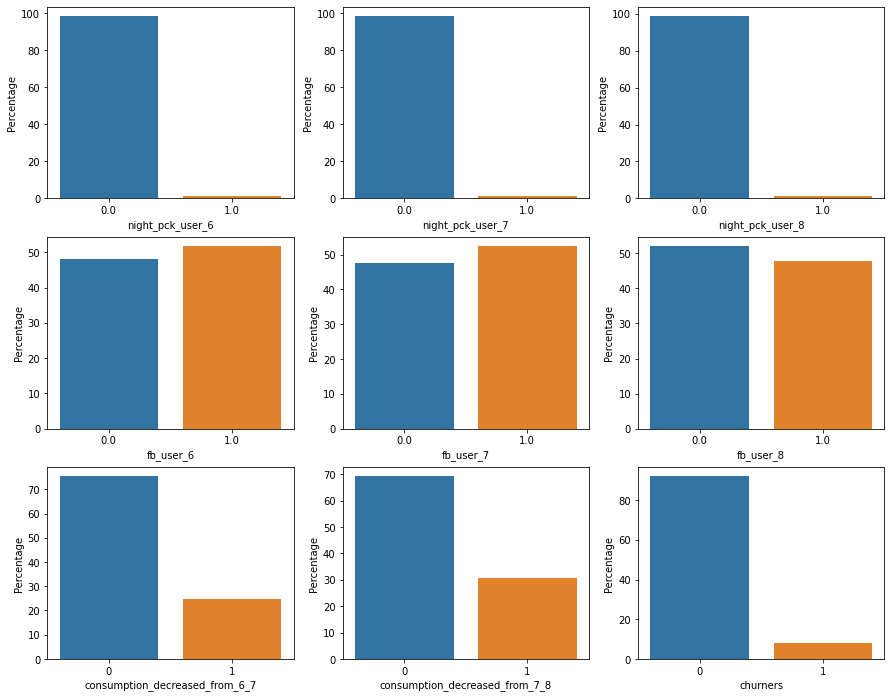

In [63]:
plt.figure(figsize = (15, 12))
counter = 1
ordered_cats = []
for c in high_value_good_customers.columns:
    if (high_value_good_customers[c].nunique()) <= 2:
        print(high_value_good_customers[c].value_counts())
        s = round(((high_value_good_customers[c].value_counts(dropna = False))/(len(high_value_good_customers[c])) * 100), 2)
        ordered_cats.append(c)
        plt.subplot(3,3,counter)
        sns.barplot(x=s.index,y=s.values)
        plt.xlabel(c)
        plt.ylabel('Percentage')
        counter +=1

plt.show()

In [64]:
##People are not using night packs
##fb consumption is very high in churners, maybe they are churning because other companies are giving cheap net

In [65]:
##From last plot it is evident that dataset is imbalanced.

### boxplots

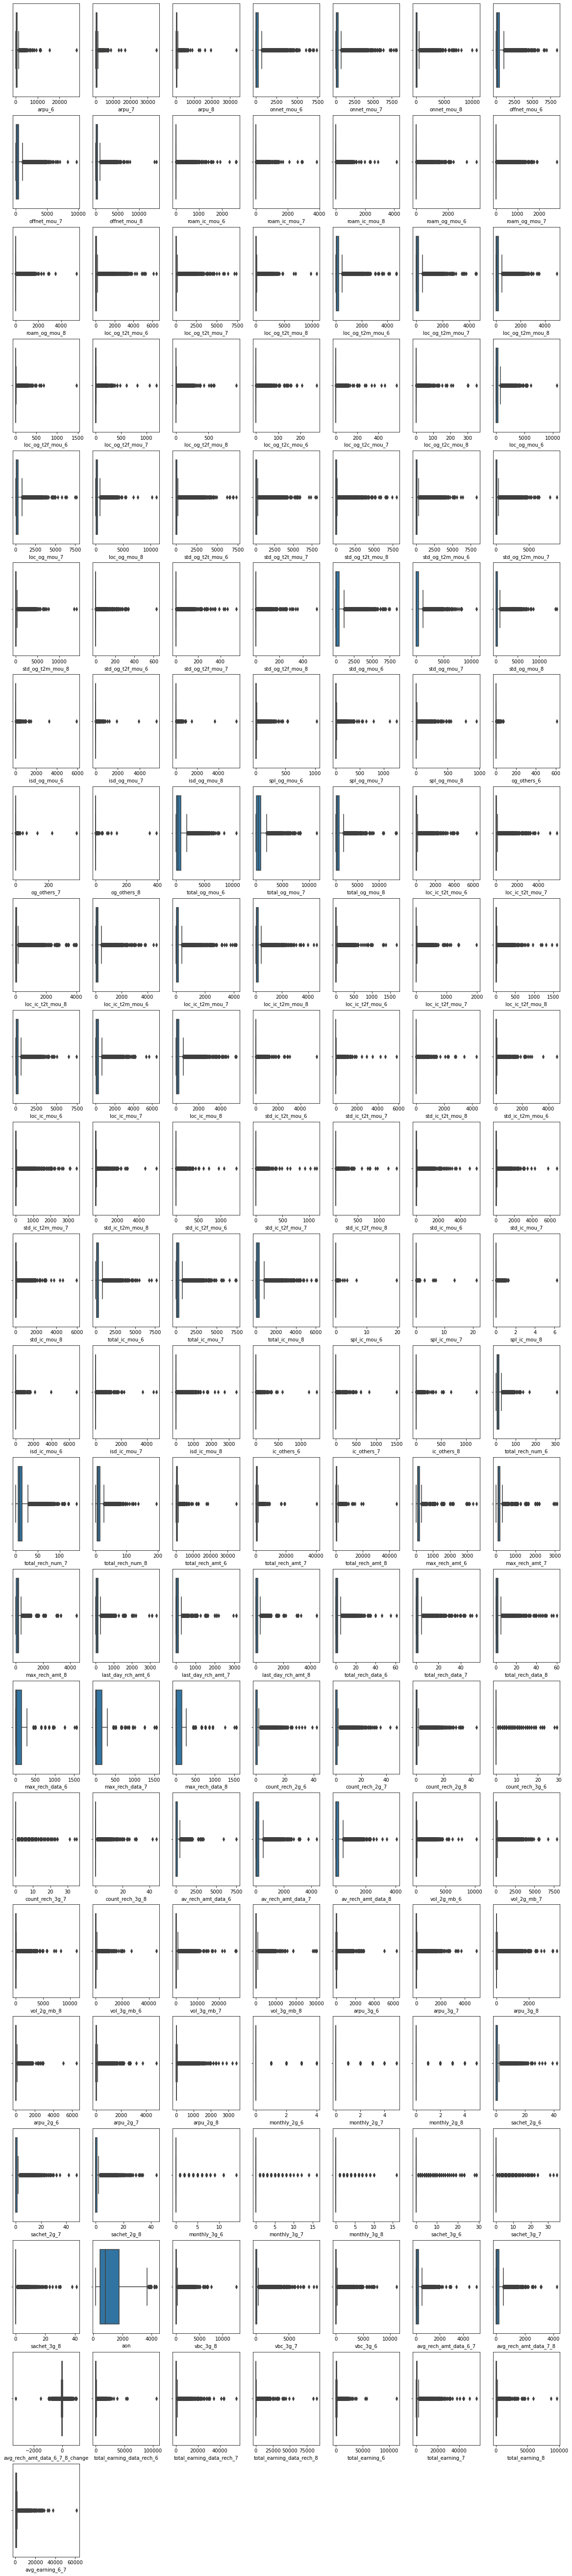

In [66]:
plt.figure(figsize=(20,100))
counter = 1

for col in high_value_good_customers.columns:
    if col not in ordered_cats and (high_value_good_customers[col].dtype == 'int64' or high_value_good_customers[col].dtype == 'float64'):
        plt.subplot(24,7,counter)
        sns.boxplot(x=col,data=high_value_good_customers)
        counter +=1

plt.show()

### Bivariate analysis

In [67]:

def plot_bivariate(y_axis,x_axis,hue,df):
    
    plt.figure(figsize = (15, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = hue, data = df, showfliers = False)
    plt.subplot(1, 3, 2)
    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = hue, data = df, showfliers = False)
    plt.subplot(1, 3, 3)
    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = hue, data = df, showfliers = False)
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

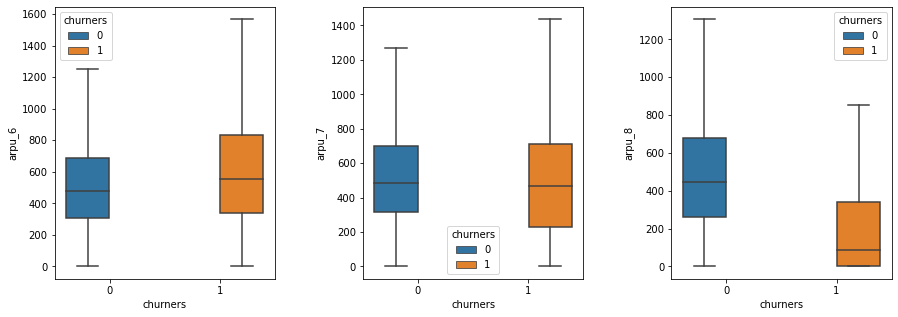

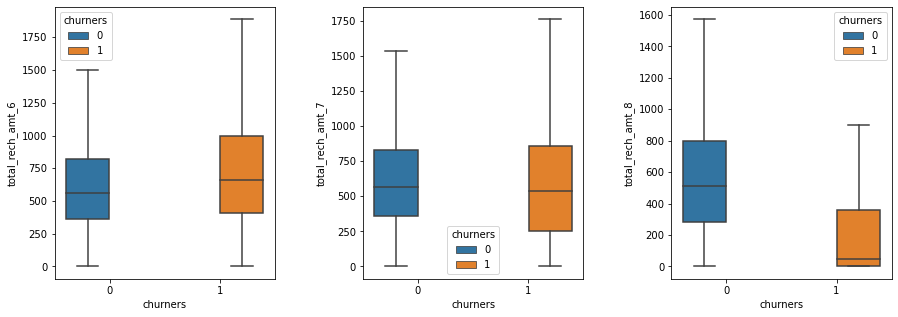

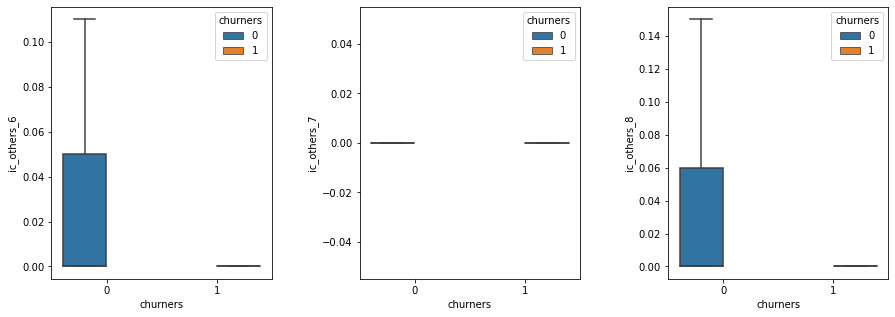

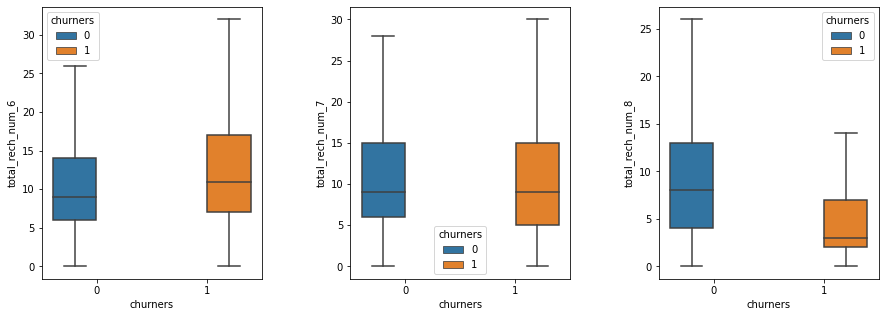

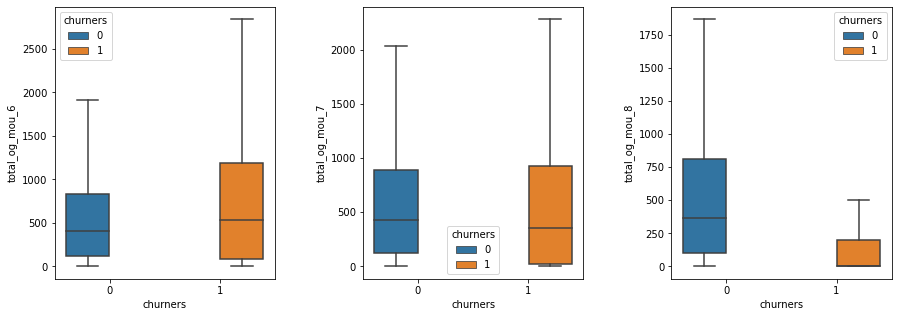

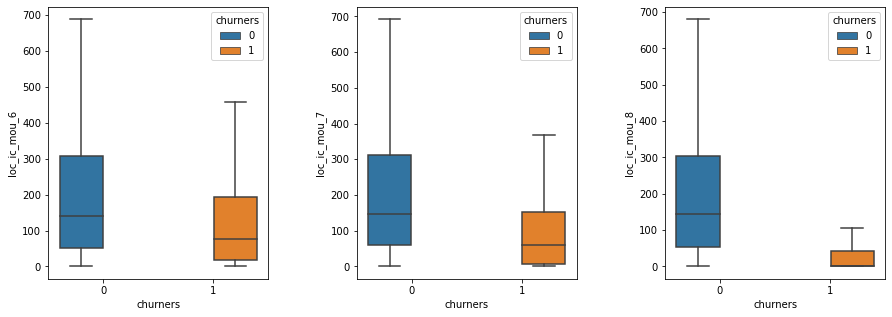

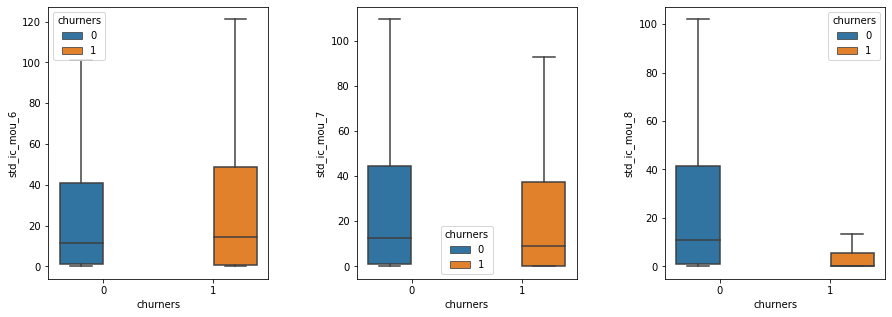

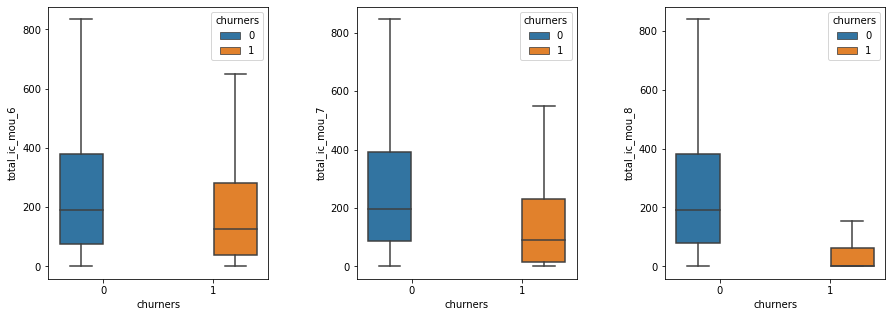

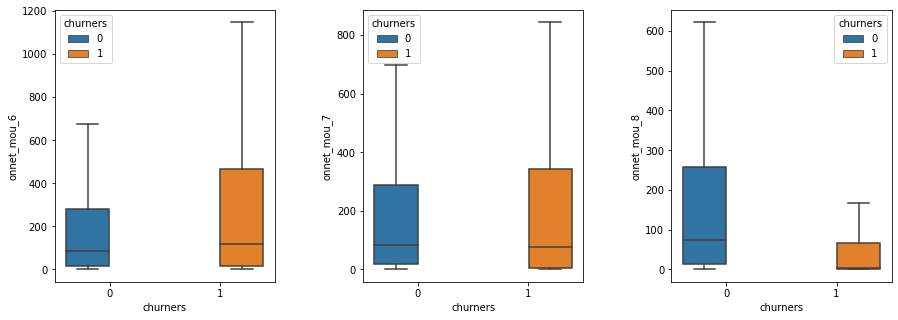

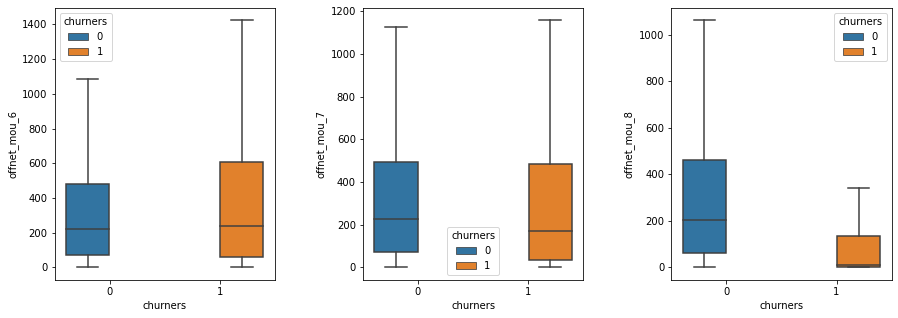

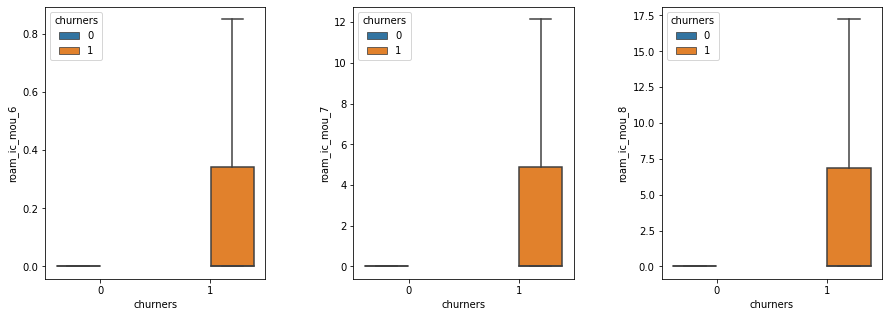

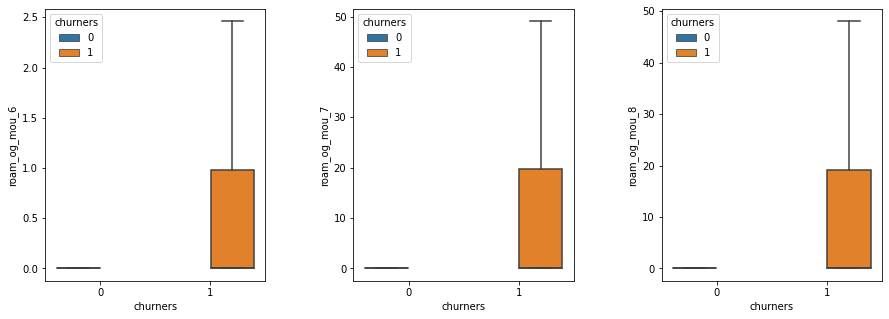

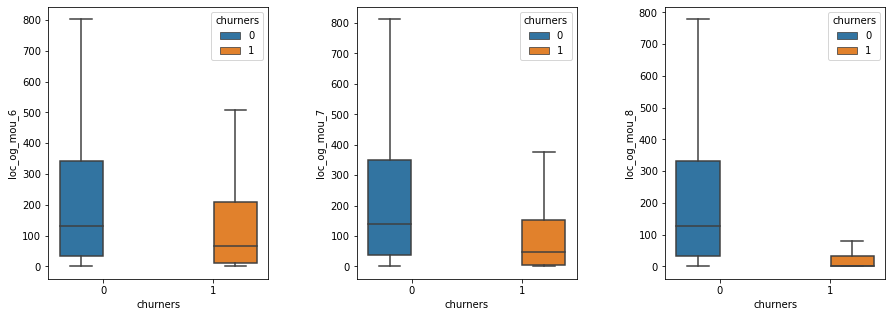

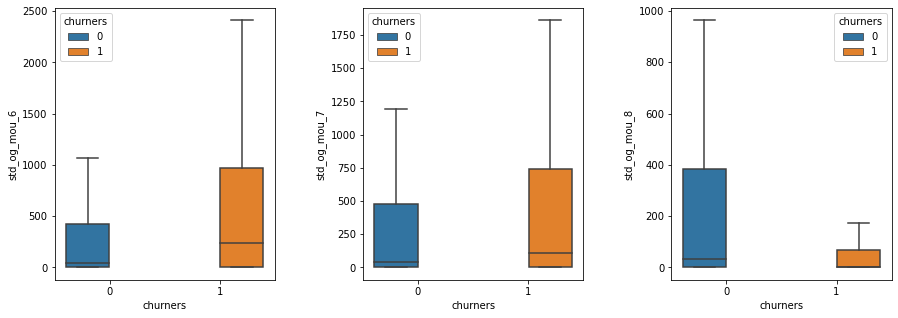

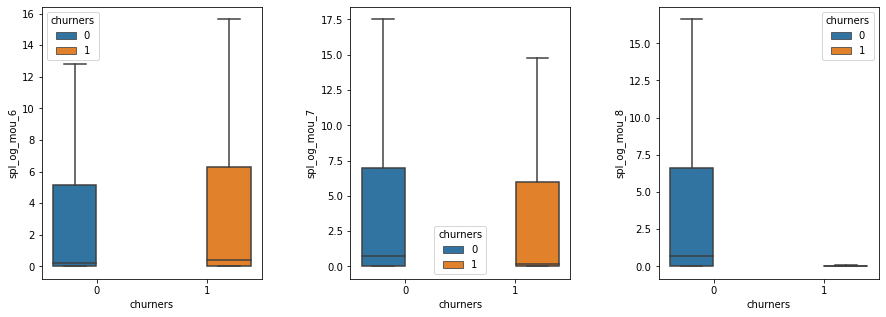

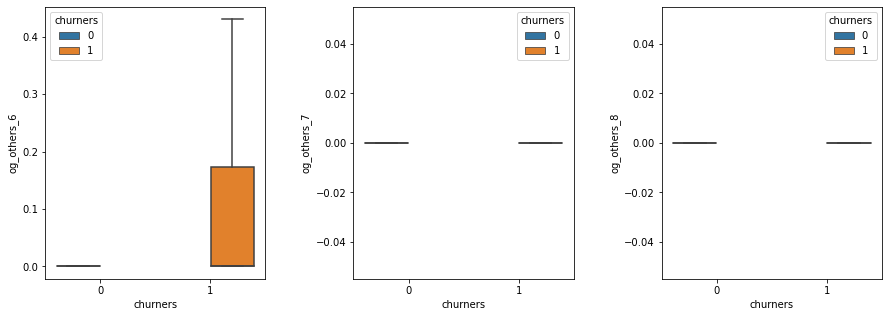

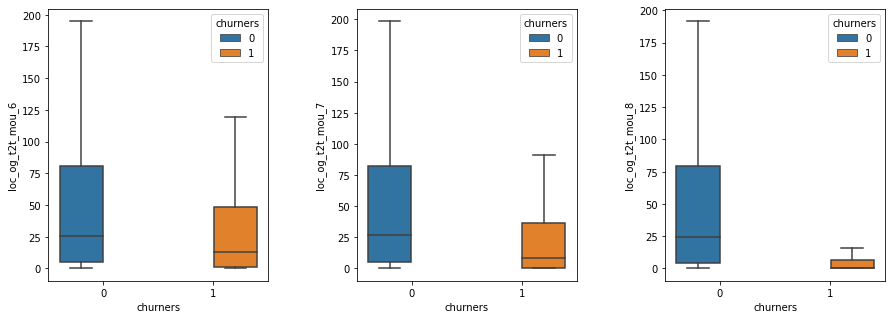

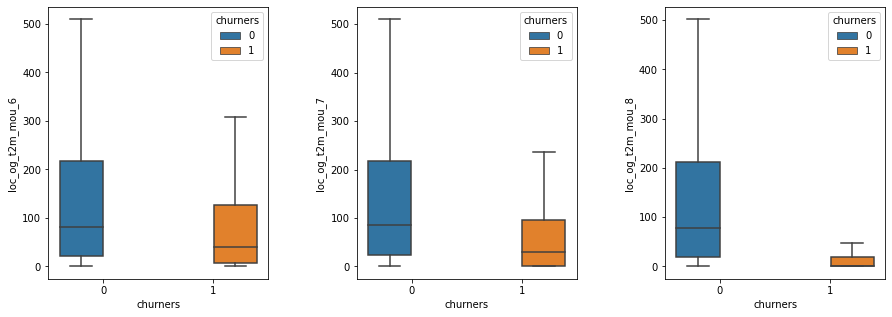

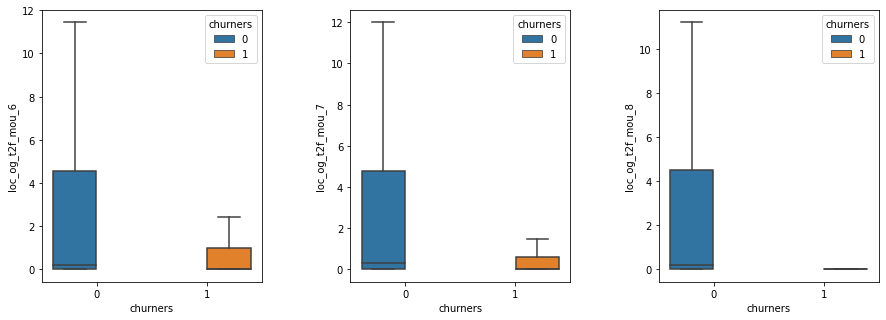

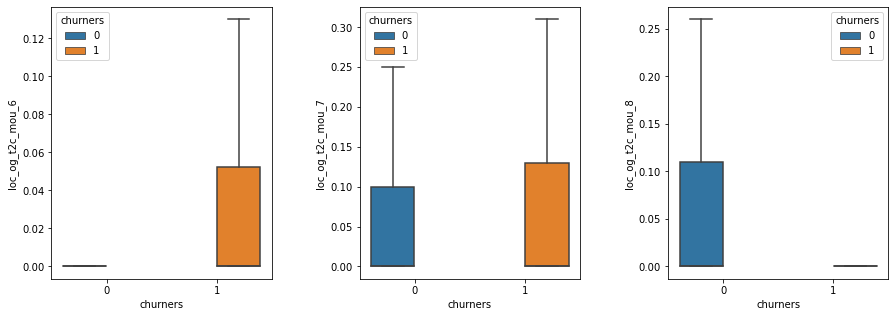

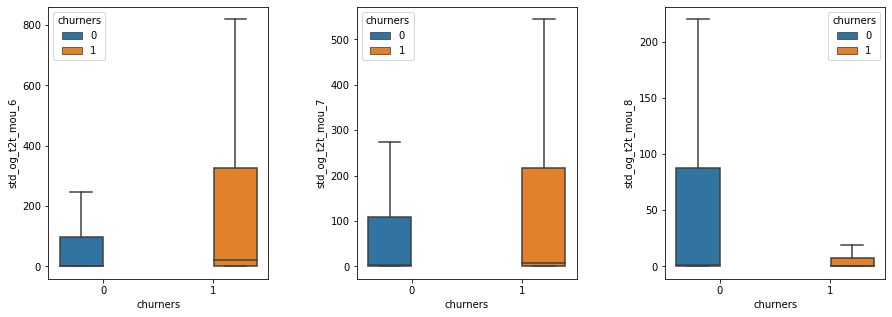

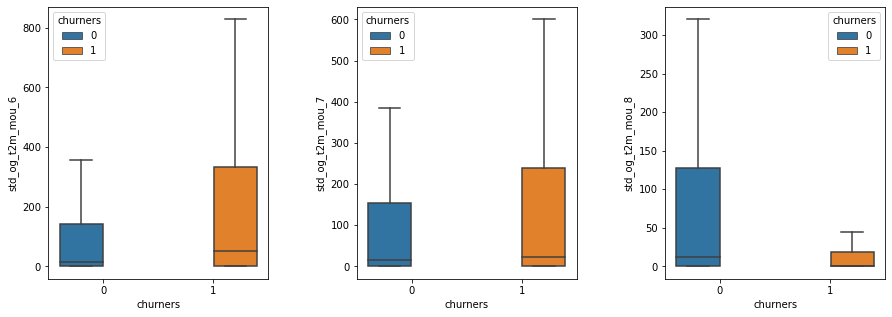

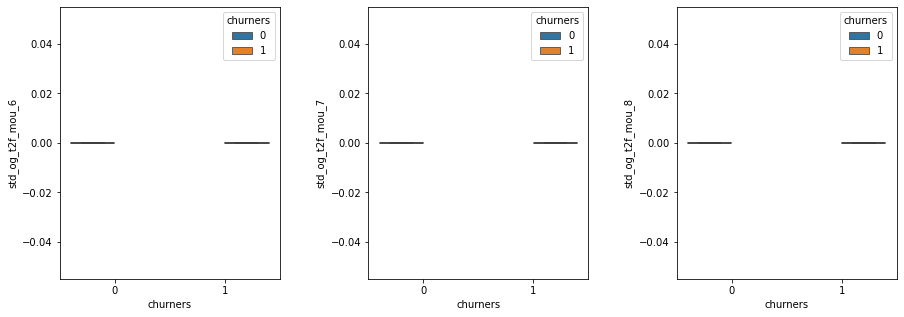

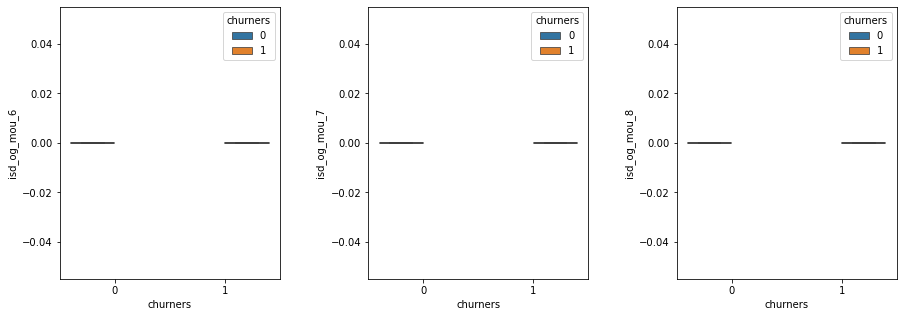

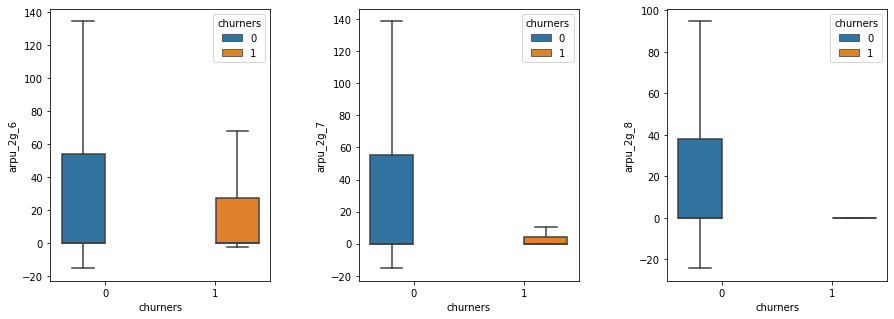

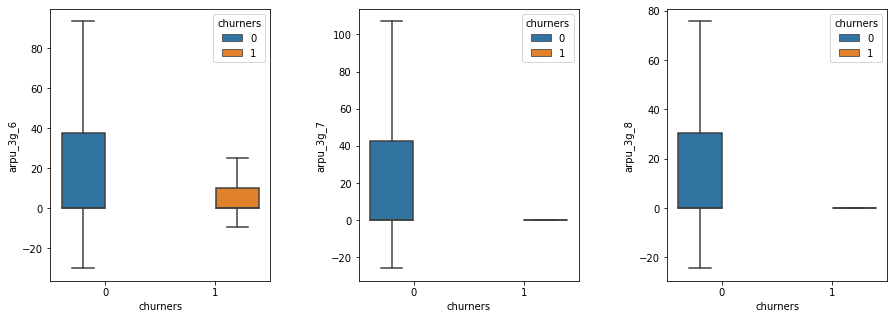

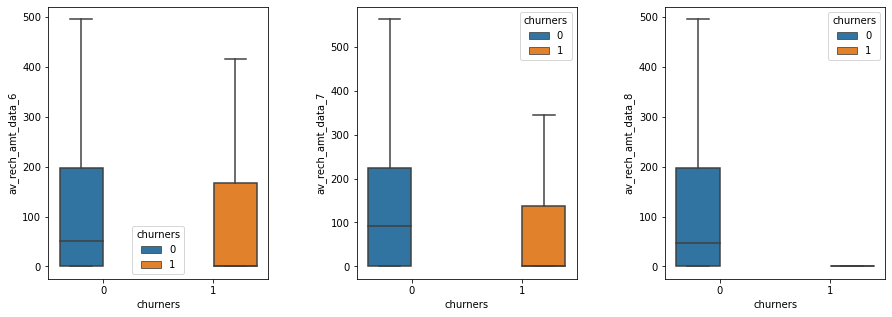

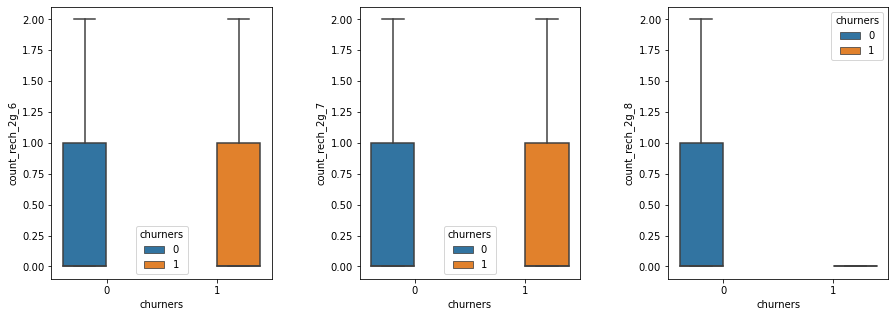

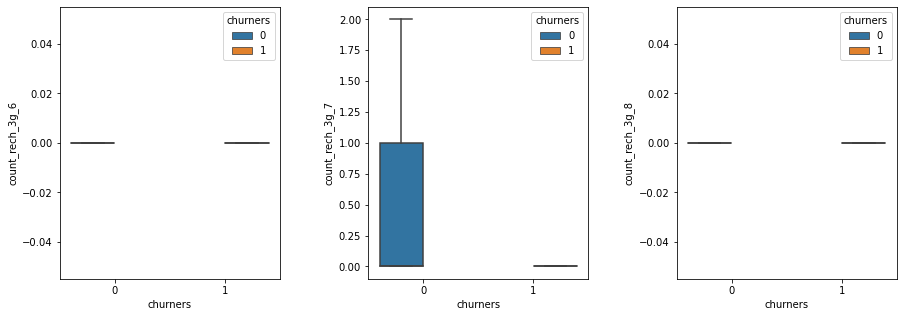

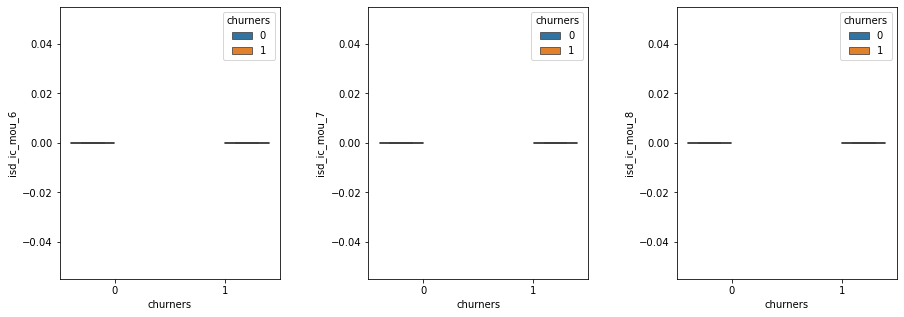

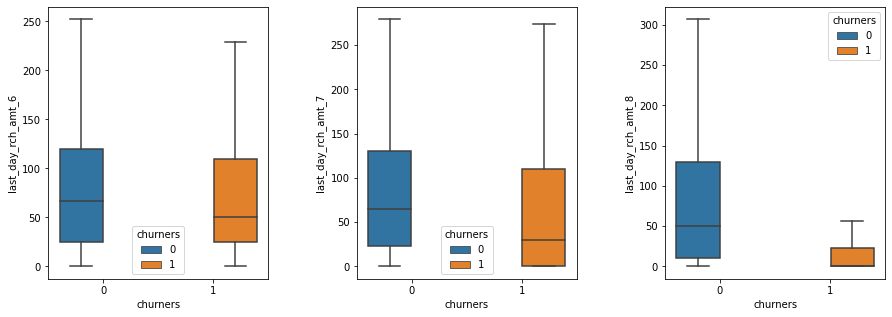

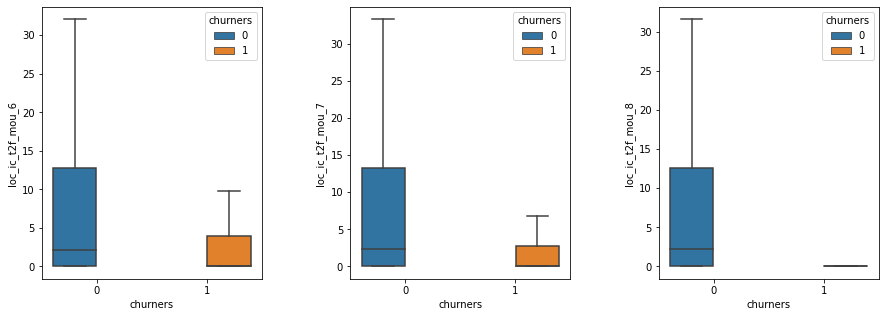

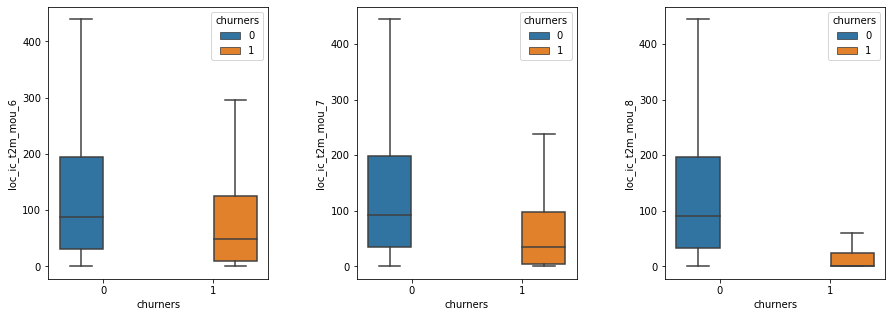

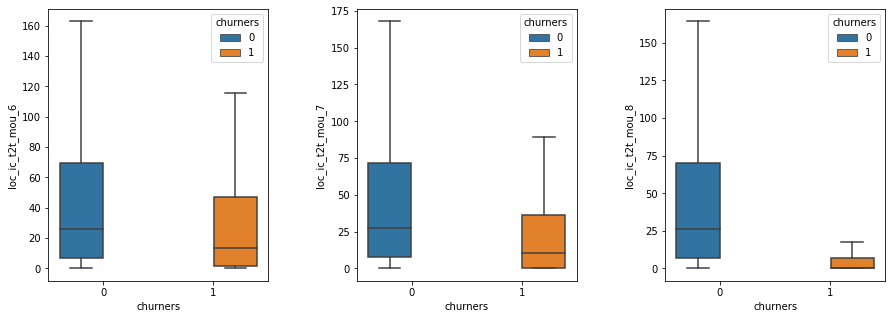

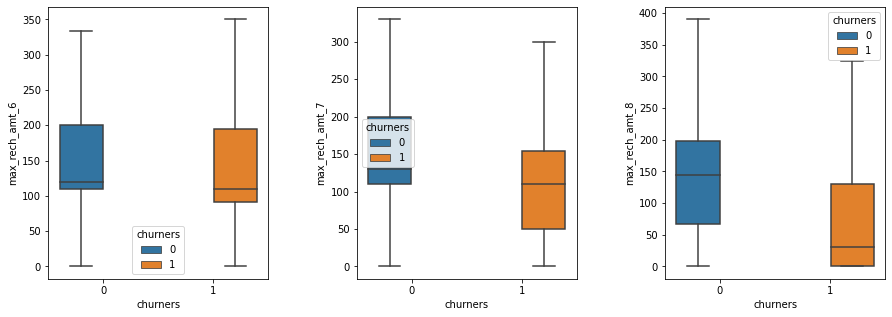

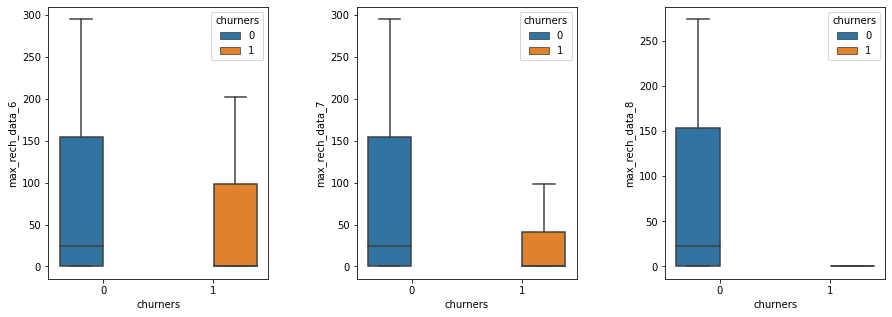

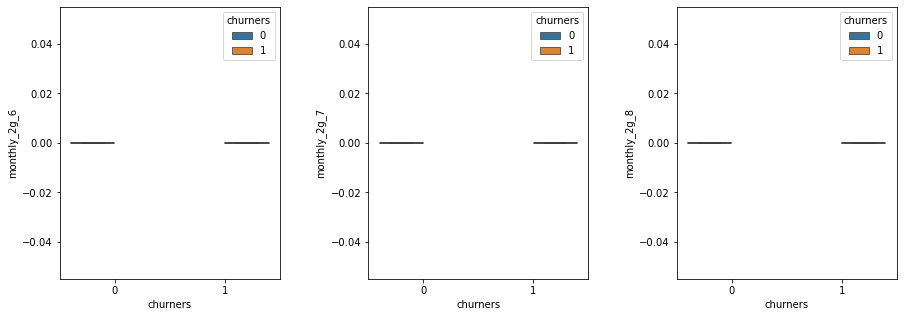

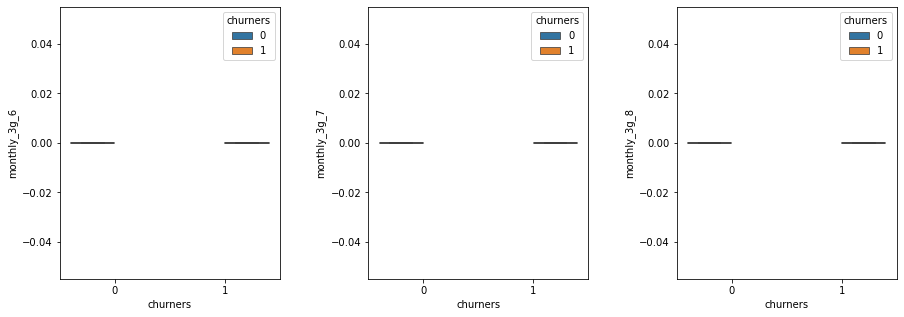

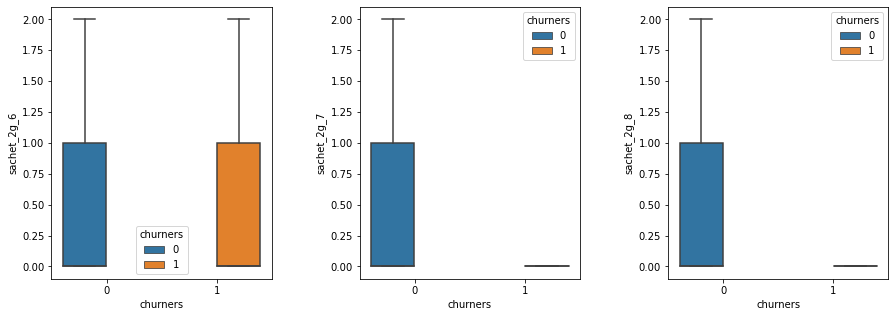

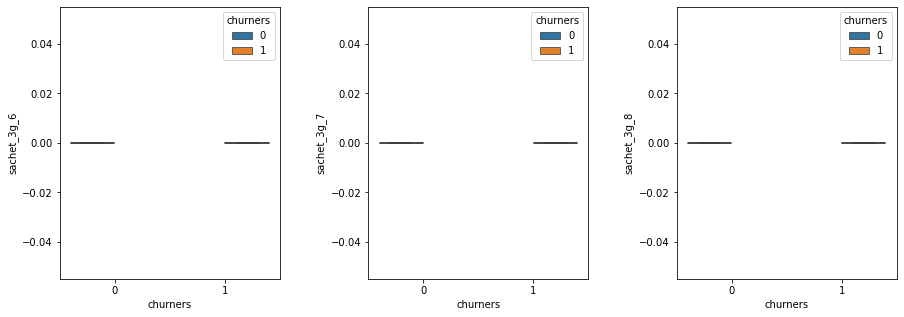

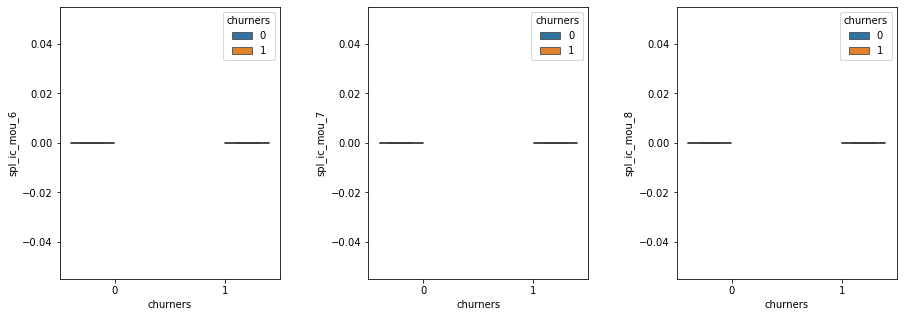

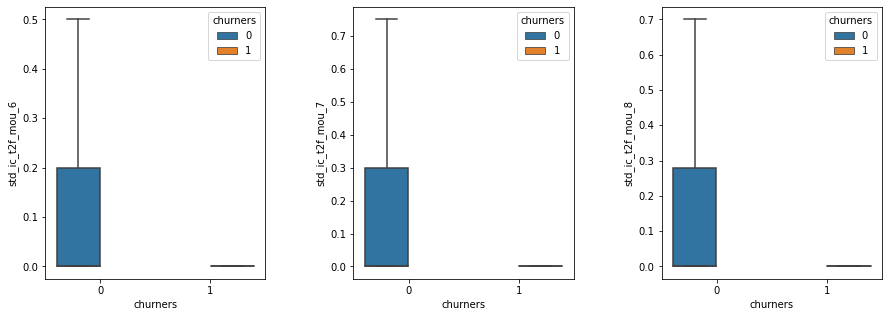

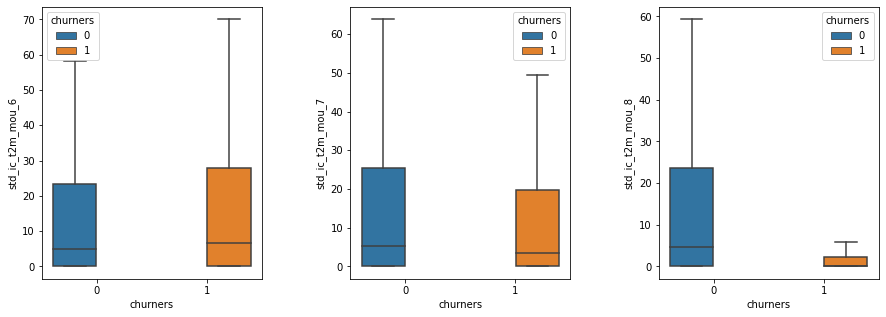

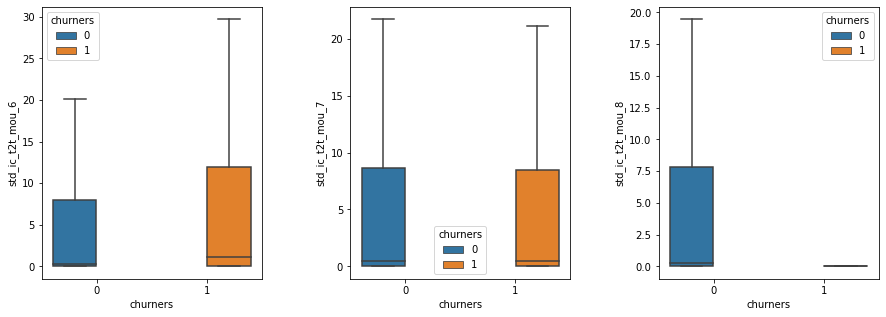

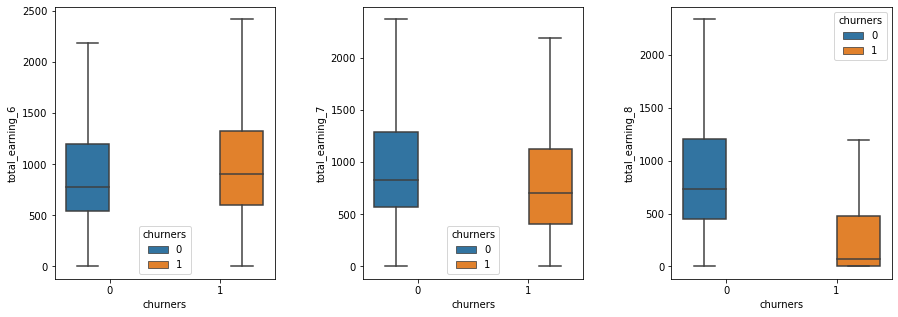

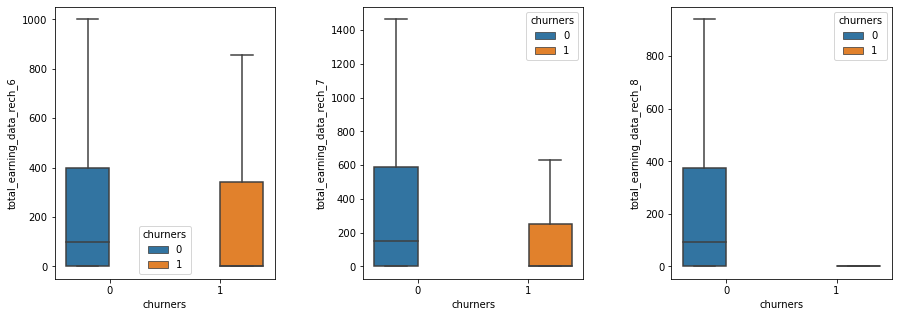

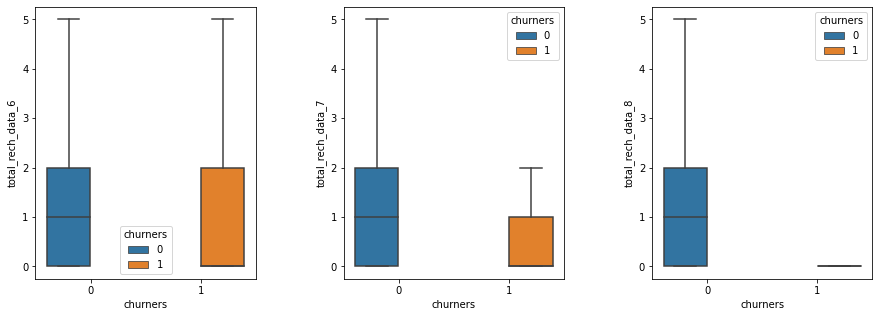

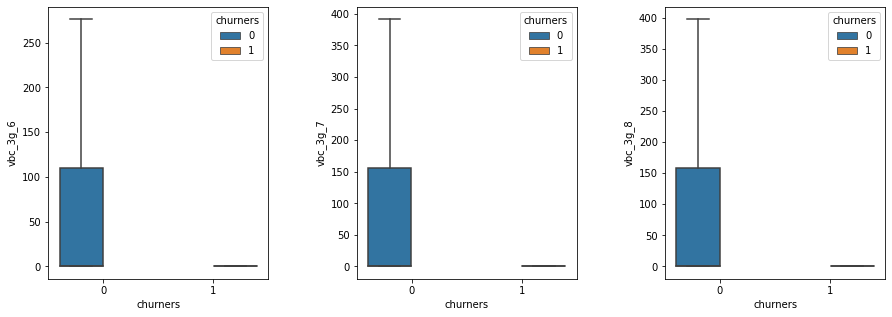

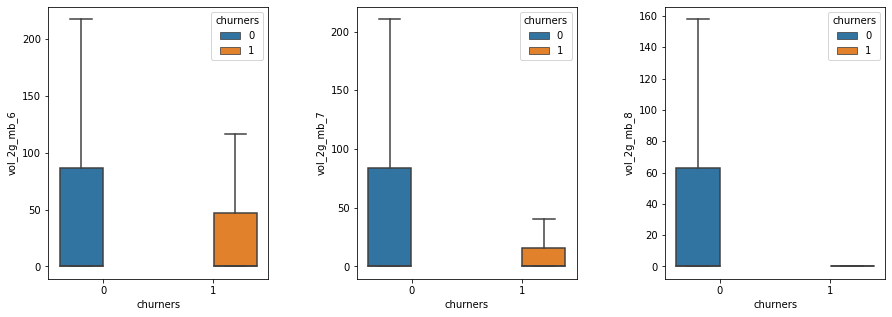

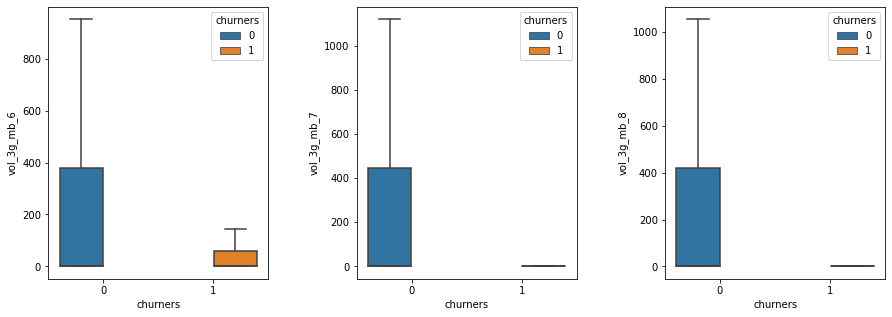

In [68]:
cols = ['arpu','total_rech_amt','ic_others','total_rech_num','total_og_mou','loc_ic_mou',\
        'std_ic_mou','total_ic_mou','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou',\
        'loc_og_mou','std_og_mou','spl_og_mou','og_others','loc_og_t2t_mou','loc_og_t2m_mou','loc_og_t2f_mou',\
        'loc_og_t2c_mou','std_og_t2t_mou','std_og_t2m_mou','std_og_t2f_mou','isd_og_mou',\
 'arpu_2g','arpu_3g','av_rech_amt_data',\
 'count_rech_2g','count_rech_3g','isd_ic_mou',\
'last_day_rch_amt','loc_ic_t2f_mou','loc_ic_t2m_mou','loc_ic_t2t_mou','max_rech_amt','max_rech_data',\
 'monthly_2g','monthly_3g','sachet_2g','sachet_3g','spl_ic_mou','std_ic_t2f_mou',\
 'std_ic_t2m_mou','std_ic_t2t_mou','total_earning','total_earning_data_rech','total_rech_data',\
 'vbc_3g','vol_2g_mb','vol_3g_mb'
       ]
for c in cols:
    plot_bivariate(y_axis=c,x_axis='churners',hue='churners',df=high_value_good_customers)

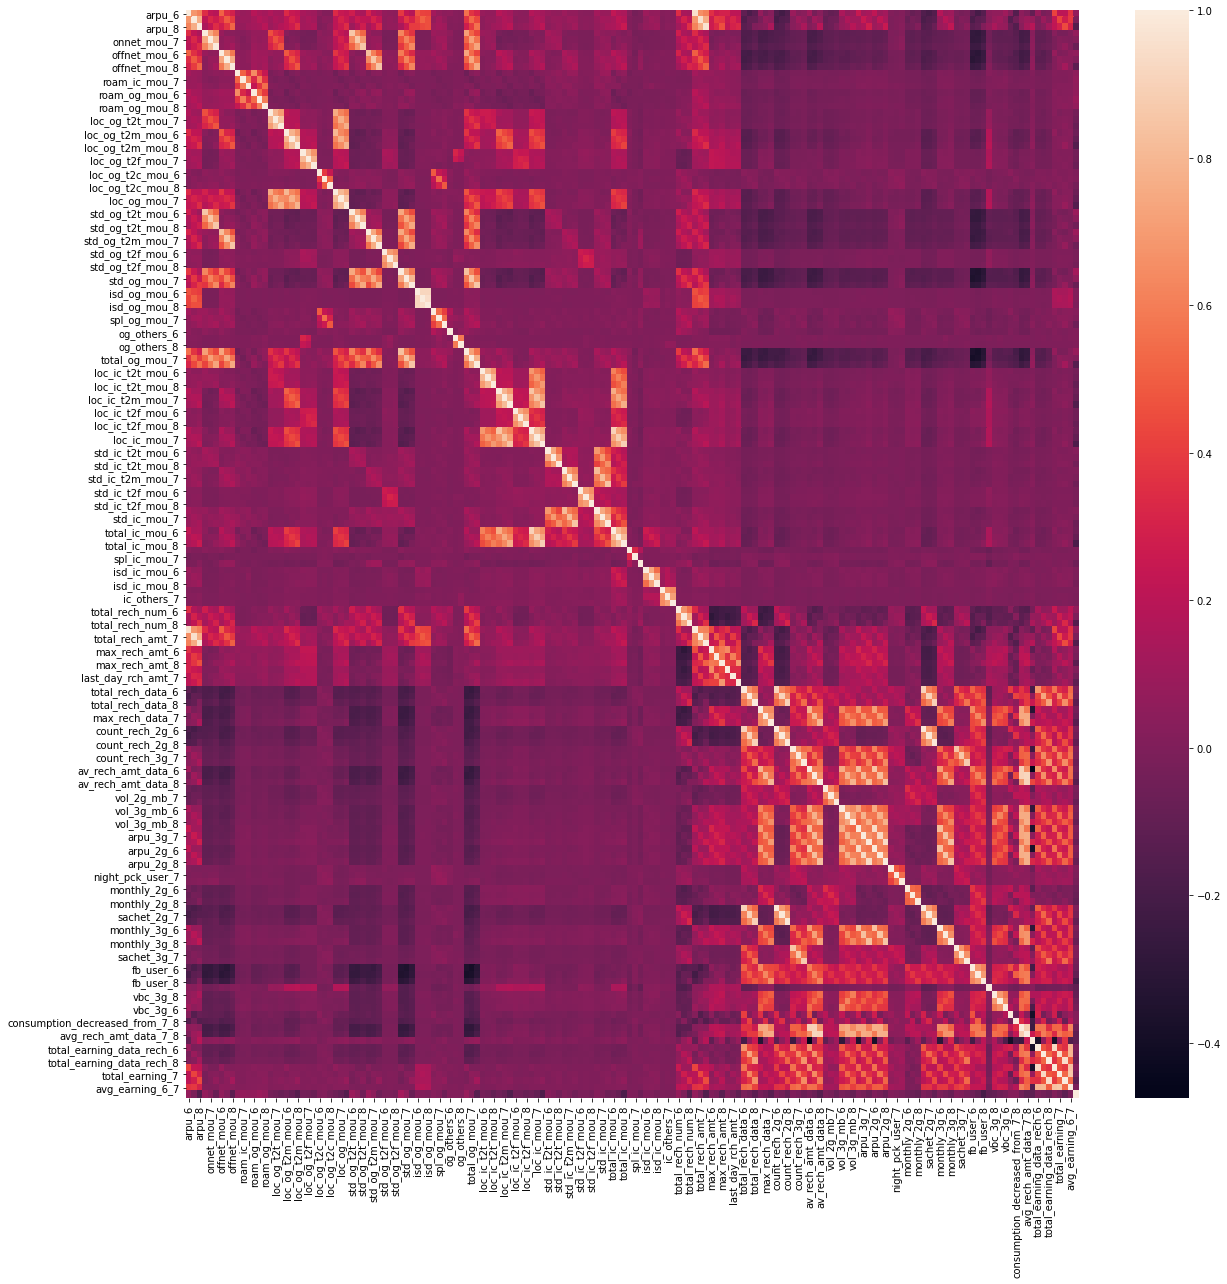

In [69]:
plt.figure(figsize = (20, 20))

sns.heatmap(high_value_good_customers.corr())

plt.show()

In [70]:
### There are many columns which are highly correleated, we will use PCA for this

In [71]:

def derive_good_action_churn_reln(df, col):
    gp_avg = col + "_good_phase_avg"
    action_phase_col = col + "_action_phase"
    df[gp_avg] = (df[col+"_6"] + df[col+"_7"])/2
    df[action_phase_col] = (df[col+"_8"] - df[gp_avg])
    df.drop([col+"_6", col+"_7", col+"_8"], axis = 1, inplace = True)
    return df
    

In [72]:
cols = ['arpu','count_rech_2g','count_rech_3g','ic_others','isd_ic_mou','isd_og_mou','loc_ic_mou','loc_og_mou',\
 'max_rech_amt','max_rech_data','monthly_2g','monthly_3g','offnet_mou','og_others','onnet_mou',\
 'roam_ic_mou','roam_og_mou','sachet_2g','sachet_3g','spl_ic_mou','spl_og_mou','std_ic_mou',\
 'std_og_mou','total_earning','total_ic_mou','total_og_mou','total_rech_amt','total_rech_data',\
 'total_rech_num','vbc_3g','vol_2g_mb','vol_3g_mb']

for col in cols:
    high_value_good_customers = derive_good_action_churn_reln(high_value_good_customers,col)
    

In [73]:
high_value_good_customers.drop(columns=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True)
high_value_good_customers.shape

(29824, 132)

In [74]:
high_value_good_customers.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,...,total_rech_data_good_phase_avg,total_rech_data_action_phase,total_rech_num_good_phase_avg,total_rech_num_action_phase,vbc_3g_good_phase_avg,vbc_3g_action_phase,vol_2g_mb_good_phase_avg,vol_2g_mb_action_phase,vol_3g_mb_good_phase_avg,vol_3g_mb_action_phase
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1.0,0.0,3.5,-1.5,50.600,-20.200,15.725,-9.975,117.165,-7.555
1,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,...,0.0,0.0,5.0,2.0,19.060,38.680,0.000,0.000,0.000,0.000
2,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,...,1.0,2.0,20.0,-6.0,516.405,-495.375,178.000,-177.970,375.475,-363.535
3,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,...,0.0,0.0,24.0,3.0,0.000,0.000,0.000,0.000,0.000,0.000
4,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,...,1.0,1.0,4.0,0.0,25.930,14.520,0.240,-0.230,299.545,710.375


### Model Building

In [75]:
from sklearn.model_selection import train_test_split

X = high_value_good_customers.drop('churners', axis = 1)
y = high_value_good_customers[['churners']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 131)
(20876, 1)
(8948, 131)
(8948, 1)


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [77]:
X_train[[col for col in X_train.columns if col not in ['churners']]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20876 entries, 29487 to 25468
Columns: 131 entries, loc_og_t2t_mou_6 to vol_3g_mb_action_phase
dtypes: float64(131)
memory usage: 21.0 MB


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pca = PCA(svd_solver = 'randomized', random_state = 2)
pca.fit(X_train)
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Components')
plt.ylabel('cumsum explained variance')
plt.show()

NameError: name 'np' is not defined

<Figure size 864x576 with 0 Axes>

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
PCA_VARS = 70
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)


In [911]:
from imblearn.metrics import sensitivity_specificity_support

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", sensitivity, 2, "\n", "Specificity: ", specificity, sep='')

Sensitivity: 0.81867388362652242
Specificity: 0.8113046656109149


In [912]:
## As classes are imbalanced i will use class weights param

In [916]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


pca = PCA()
logistic = LogisticRegression(class_weight={0:0.05, 1: 0.95})
steps = [ ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)
params = {'pca__n_components': [70, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [917]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/kinny/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.87555433 0.87517312        nan        nan
 0.87583962 0.87619254        nan        nan 0.87578685 0.87578814
        nan        nan 0.87602827 0.8757151         nan        nan
 0.87594911 0.87525308        nan        nan 0.87463413 0.87564872
        nan        nan 0.87487103 0.87547292        nan        nan
 0.87485099 0.87710955]
  warnings.warn(
/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/kinny/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.05,
                                                                         1: 0.95}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [70, 80]},
             scoring='roc_auc', verbose=1)

In [918]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.100559,0.032483,0.000000,0.000000,0.1,l1,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.485919,0.094870,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
2,3.254272,0.083885,0.037509,0.003696,0.1,l2,70,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.868443,0.880364,0.879196,0.868671,0.881097,0.875554,0.005746,10
3,3.693590,0.070213,0.029961,0.000547,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.868192,0.878828,0.880834,0.870020,0.877992,0.875173,0.005072,13
4,1.940177,0.133964,0.000000,0.000000,0.5,l1,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
5,2.258936,0.240324,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
6,3.401207,0.085471,0.047586,0.007820,0.5,l2,70,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.868805,0.879349,0.881258,0.870959,0.878828,0.875840,0.004978,5
7,3.784940,0.031511,0.042786,0.008793,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.869049,0.881417,0.881764,0.870381,0.878352,0.876193,0.005437,2
8,1.874808,0.118576,0.000000,0.000000,1,l1,70,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
9,2.473071,0.255062,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [919]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.877109549666122
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [920]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

[[4138 4071]
 [  55  684]]
Sensitivity: 	0.93
Specificity: 	0.5


In [921]:
### Random Forest

In [946]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
params = {"criterion": ['gini', 'entropy'], "max_features": ['log2','auto'],"min_samples_split":[2,5,10,20,30],"min_samples_leaf":[1,5,10,20,40]}
folds = StratifiedKFold(n_splits = 5, shuffle = True)
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [947]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/kinny/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'auto'],
                         'min_samples_leaf': [1, 5, 10, 20, 40],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [948]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9278613258566933
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 30}


In [949]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.579005,0.455309,0.220800,0.046009,gini,log2,1,2,"{'criterion': 'gini', 'max_features': 'log2', ...",0.922949,0.921283,0.933329,0.911085,0.925430,0.922815,0.007174,96
1,6.524087,0.318456,0.250459,0.081188,gini,log2,1,5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.931670,0.917127,0.935214,0.912828,0.924059,0.924180,0.008444,78
2,6.357910,0.313792,0.378691,0.124963,gini,log2,1,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.926539,0.913176,0.935338,0.913197,0.922730,0.922196,0.008417,100
3,6.229491,0.642250,0.298885,0.111161,gini,log2,1,20,"{'criterion': 'gini', 'max_features': 'log2', ...",0.928039,0.911249,0.934498,0.917964,0.923856,0.923121,0.008021,90
4,6.355780,0.412154,0.399771,0.092112,gini,log2,1,30,"{'criterion': 'gini', 'max_features': 'log2', ...",0.930004,0.911627,0.935921,0.917184,0.928928,0.924733,0.008937,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.778829,1.377818,0.469572,0.037860,entropy,auto,40,2,"{'criterion': 'entropy', 'max_features': 'auto...",0.929732,0.911579,0.936143,0.918069,0.929029,0.924910,0.008842,61
96,10.778183,0.261249,0.483736,0.046967,entropy,auto,40,5,"{'criterion': 'entropy', 'max_features': 'auto...",0.932308,0.912363,0.937860,0.915971,0.927617,0.925224,0.009660,53
97,9.883689,0.953765,0.508541,0.072792,entropy,auto,40,10,"{'criterion': 'entropy', 'max_features': 'auto...",0.929519,0.912135,0.938139,0.917878,0.929443,0.925423,0.009253,43
98,9.210760,0.867453,0.384361,0.083278,entropy,auto,40,20,"{'criterion': 'entropy', 'max_features': 'auto...",0.931067,0.912578,0.937363,0.918074,0.928920,0.925600,0.009005,38


In [950]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", sensitivity, "\n", "Specificity: ", specificity, sep='')

[[7867  342]
 [ 261  478]]
Sensitivity: 0.6468200270635994
Specificity: 0.9583384090632233


In [961]:
##XGBOOST
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve,\
recall_score, accuracy_score, confusion_matrix, f1_score


In [979]:
def plot_scores(model, X_test):
    
    scores = []
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    test_pred = model.predict(X_test.values)
    test_pred_probs = model.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), test_pred)
    precision, recall, _ = precision_recall_curve(y_test.values.ravel(), test_pred)

    model_f1_score = f1_score(y_test.values.ravel(), test_pred)
    model_precision= precision_score(y_test.values.ravel(), test_pred)
    model_recall = recall_score(y_test.values.ravel(), test_pred)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), test_pred)
    model_auc_roc = auc(fpr, tpr)


    scores.append((model_precision,model_recall,model_f1_score,
                   model_accuracy_score,model_auc_roc,
                   confusion_matrix(y_test.values.ravel(), test_pred)))

    axes[0].plot(fpr, tpr, label = "auc_roc ={}".format(model_auc_roc))
    axes[1].plot(recall, precision, marker='.', label='Logistic')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_title("AUC-ROC curve")
    axes[0].set_xlabel("FPR")
    axes[0].set_ylabel("TPR")
    axes[1].set_title("Prec-Rec curve")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    plt.tight_layout()
    plt.show()
    
    return scores

/home/kinny/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:04:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kinny/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


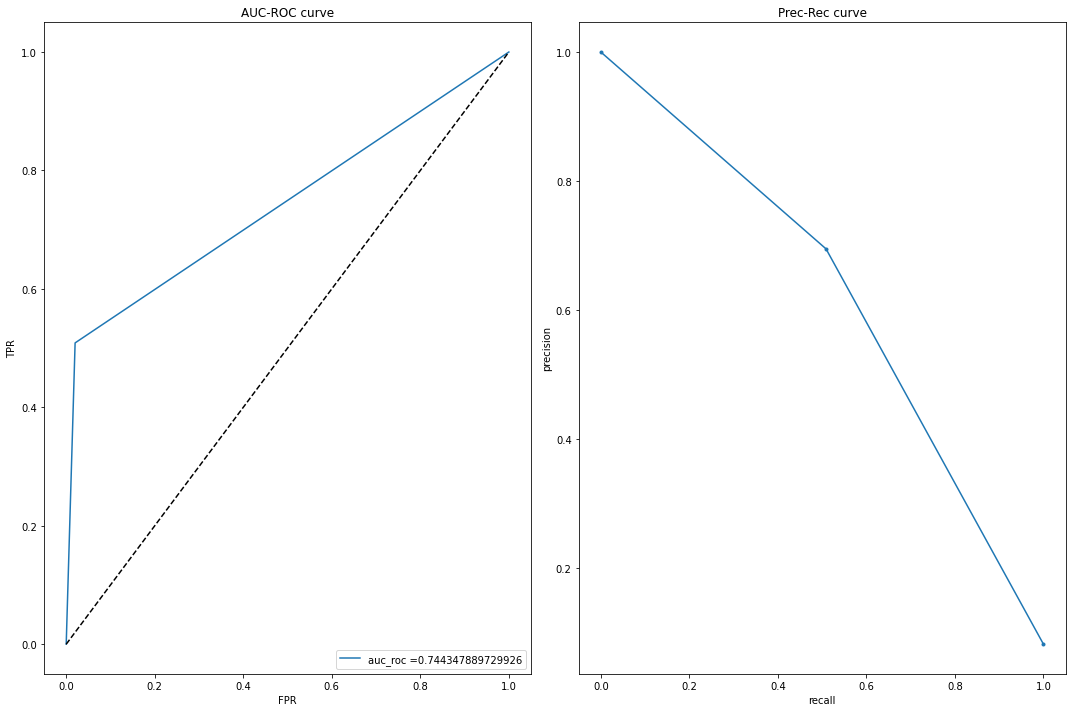

,precision,recall,f1,accuracy,auc_roc,confusion_matrix
0,0.695009,0.508796,0.5875,0.940992,0.744348,"[[8044, 165], [363, 376]]"


In [981]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs = -1,)
xgb = xgb.fit(X_train, y_train)

scores = plot_scores( xgb, X_test)
results = pd.DataFrame(scores, columns = [ 'precision', 'recall', 'f1','accuracy',
                                                   'auc_roc', 'confusion_matrix'])
results

In [994]:
##SVM
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import svm

In [1007]:
hyper_params = [ {'gamma': [0.1], 'C': [100, ]}]
folds = KFold(n_splits = 2, shuffle = True, random_state = 101)
model = svm.SVC(kernel="rbf")
model_cv_svm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      
model_cv_svm.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [100], 'gamma': [0.1]}], return_train_score=True,
             scoring='accuracy', verbose=1)

In [1008]:
svm_cv_results = pd.DataFrame(model_cv_svm.cv_results_)
svm_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,43.290734,2.672032,17.421746,0.117338,100,0.1,"{'C': 100, 'gamma': 0.1}",0.919908,0.924411,0.922159,0.002251,1,1.0,1.0,1.0,0.0


In [1009]:
test_pred = model_cv_svm.predict(X_test.values)

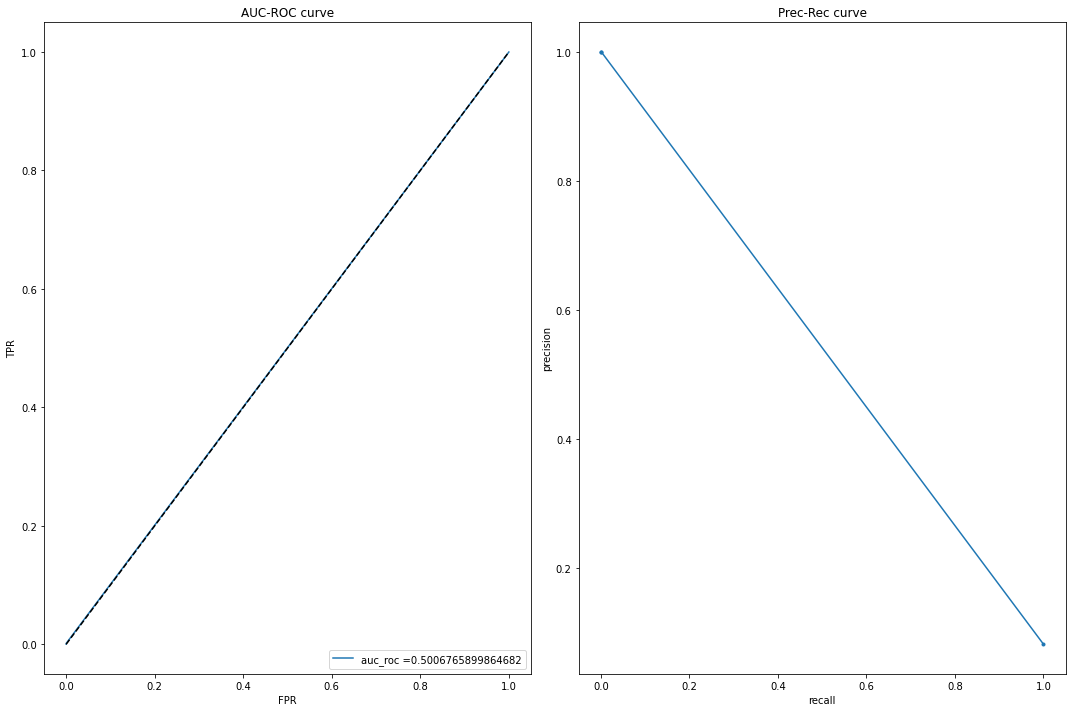

In [1010]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), test_pred)
precision, recall, _ = precision_recall_curve(y_test.values.ravel(), test_pred)
model_auc_roc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, label = "auc_roc ={}".format(model_auc_roc))
axes[1].plot(recall, precision, marker='.', label='Logistic')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].legend(loc = "lower right")
axes[0].set_title("AUC-ROC curve")
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[1].set_title("Prec-Rec curve")
axes[1].set_xlabel("recall")
axes[1].set_ylabel("precision")
plt.tight_layout()
plt.show()

In [1011]:
print(precision,recall)

[0.08258829 1.         1.        ] [1.         0.00135318 0.        ]


In [1012]:
##As none of the models is performing good lets expore XGBOOST

In [1013]:
folds = 5
param_grid = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}          
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

In [1014]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/kinny/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:55:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

/home/kinny/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


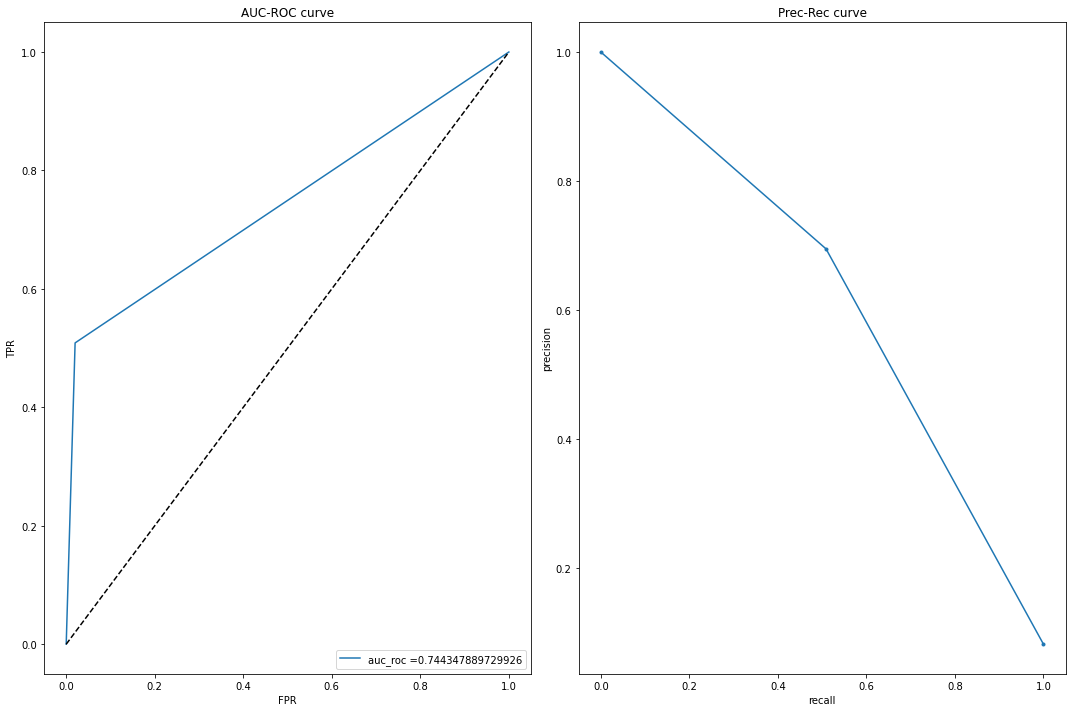

,precision,recall,f1,accuracy,auc_roc,confusion_matrix
0,0.695009,0.508796,0.5875,0.940992,0.744348,"[[8044, 165], [363, 376]]"


In [1015]:
scores = plot_scores( model_cv, X_test)
results = pd.DataFrame(scores, columns = [ 'precision', 'recall', 'f1','accuracy',
                                                   'auc_roc', 'confusion_matrix'])
results

In [1016]:
##Using scale_pos_weight to handle class imbalance

In [1017]:
folds = 5
param_grid = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5],'scale_pos_weight':[0.9,0.8]}          
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

In [1018]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/kinny/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[18:08:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

/home/kinny/.local/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


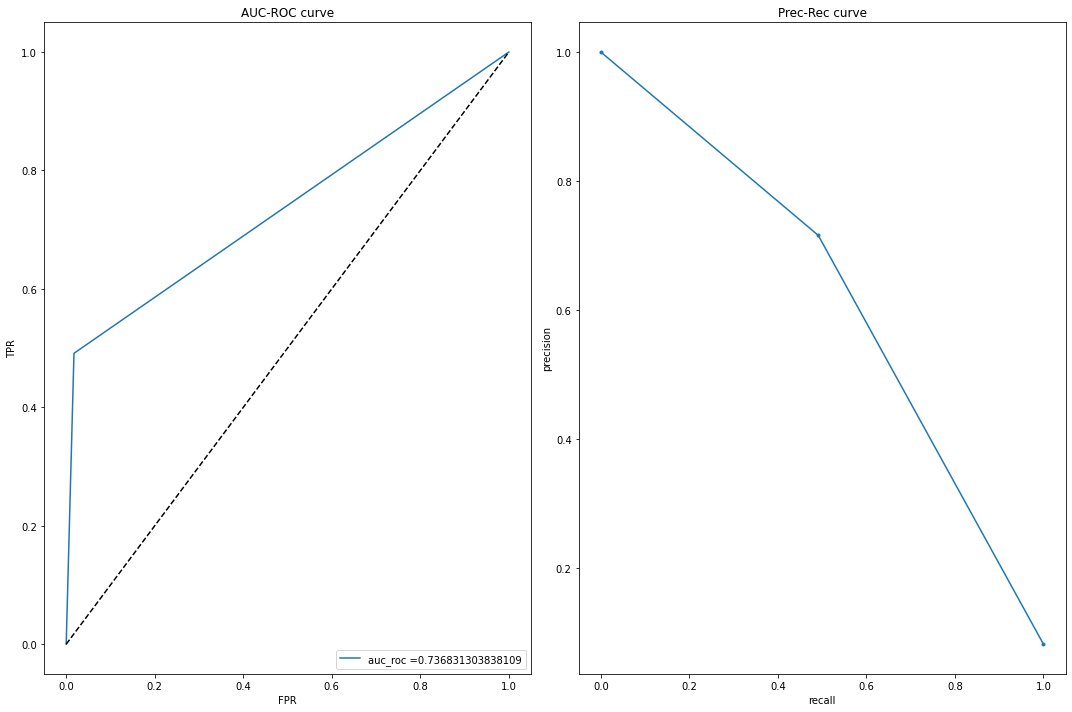

,precision,recall,f1,accuracy,auc_roc,confusion_matrix
0,0.715976,0.491204,0.582665,0.941886,0.736831,"[[8065, 144], [376, 363]]"


In [1022]:
scores = plot_scores( model_cv, X_test)
results = pd.DataFrame(scores, columns = [ 'precision', 'recall', 'f1','accuracy',
                                                   'auc_roc', 'confusion_matrix'])
results

In [1284]:
feature_importances = pd.DataFrame(model_cv.best_estimator_.feature_importances_*100,
                                   index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [1285]:
feature_importances.head(50)

,importance
arpu_action_phase,13.498017
vol_3g_mb_action_phase,7.230224
loc_ic_t2m_mou_8,6.998152
sachet_3g_action_phase,6.929762
fb_user_8,5.023029
sachet_2g_action_phase,2.718237
last_day_rch_amt_8,2.535639
isd_ic_mou_action_phase,2.448034
spl_ic_mou_action_phase,2.154523
ic_others_good_phase_avg,1.587581


In [1286]:
#extracting top 50 features
top_n = 50
top_features = feature_importances.index[0:top_n]

In [1287]:
top_features

Index(['arpu_action_phase', 'vol_3g_mb_action_phase', 'loc_ic_t2m_mou_8',
       'sachet_3g_action_phase', 'fb_user_8', 'sachet_2g_action_phase',
       'last_day_rch_amt_8', 'isd_ic_mou_action_phase',
       'spl_ic_mou_action_phase', 'ic_others_good_phase_avg',
       'ic_others_action_phase', 'roam_og_mou_action_phase',
       'total_rech_data_action_phase', 'fb_user_7',
       'total_rech_amt_good_phase_avg', 'monthly_3g_action_phase',
       'loc_og_t2m_mou_8', 'isd_ic_mou_good_phase_avg',
       'roam_ic_mou_action_phase', 'total_earning_action_phase',
       'total_earning_good_phase_avg', 'spl_og_mou_good_phase_avg',
       'avg_rech_amt_data_6_7_8_change', 'og_others_action_phase',
       'std_ic_mou_action_phase', 'vbc_3g_good_phase_avg',
       'og_others_good_phase_avg', 'std_og_mou_action_phase',
       'std_og_mou_good_phase_avg', 'loc_og_t2t_mou_8',
       'vol_2g_mb_action_phase', 'loc_og_t2c_mou_7', 'last_day_rch_amt_6',
       'fb_user_6', 'loc_ic_t2t_mou_8', 'count_r

<AxesSubplot:>

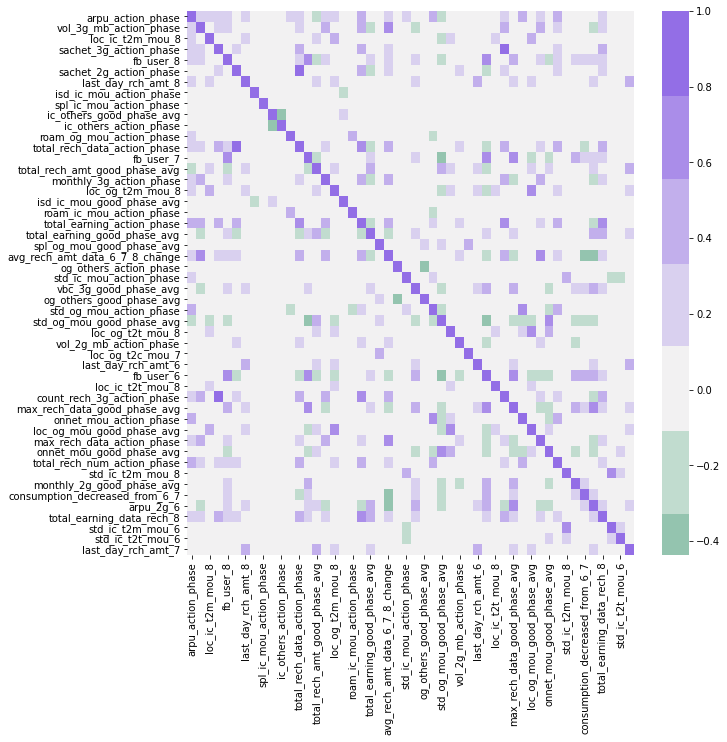

In [1288]:
plt.figure(figsize=(10,10))
mycmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [1289]:
corr_matrix = X_train[top_features].corr().abs()
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))
less_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] < 0.05)]
print("List of low correlated features from the above plot \n", less_correlated_features)
print("len \n", len(less_correlated_features))

List of low correlated features from the above plot 
 ['loc_ic_t2m_mou_8', 'sachet_3g_action_phase', 'fb_user_8', 'sachet_2g_action_phase', 'last_day_rch_amt_8', 'isd_ic_mou_action_phase', 'spl_ic_mou_action_phase', 'ic_others_good_phase_avg', 'ic_others_action_phase', 'roam_og_mou_action_phase', 'total_rech_data_action_phase', 'fb_user_7', 'total_rech_amt_good_phase_avg', 'monthly_3g_action_phase', 'loc_og_t2m_mou_8', 'isd_ic_mou_good_phase_avg', 'roam_ic_mou_action_phase', 'total_earning_action_phase', 'total_earning_good_phase_avg', 'spl_og_mou_good_phase_avg', 'avg_rech_amt_data_6_7_8_change', 'og_others_action_phase', 'std_ic_mou_action_phase', 'vbc_3g_good_phase_avg', 'og_others_good_phase_avg', 'std_og_mou_action_phase', 'std_og_mou_good_phase_avg', 'loc_og_t2t_mou_8', 'vol_2g_mb_action_phase', 'loc_og_t2c_mou_7', 'last_day_rch_amt_6', 'fb_user_6', 'loc_ic_t2t_mou_8', 'count_rech_3g_action_phase', 'max_rech_data_good_phase_avg', 'onnet_mou_action_phase', 'loc_og_mou_good_phase_a

<ipython-input-1289-ca8d74d0905f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))


In [1290]:
# Building model from top less correlated features
X_train = X_train[less_correlated_features]
X_test = X_test[less_correlated_features]

In [1291]:
##log reg
steps = [ 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]
logistic = Pipeline(steps)
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10,20], 'logistic__penalty': ['l1', 'l2']}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1292]:
model.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/kinny/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88361599        nan 0.88422724        nan 0.88429622
        nan 0.88434455        nan 0.88435341        nan 0.88436849
        nan 0.88437624        nan 0.88438941        nan 0.88439469]
  warnings.warn(
/home/kinny/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=40, shuffle=True),
             estimator=Pipeline(steps=[('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [1293]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8843946915277014
Best hyperparameters:  {'logistic__C': 20, 'logistic__penalty': 'l2'}


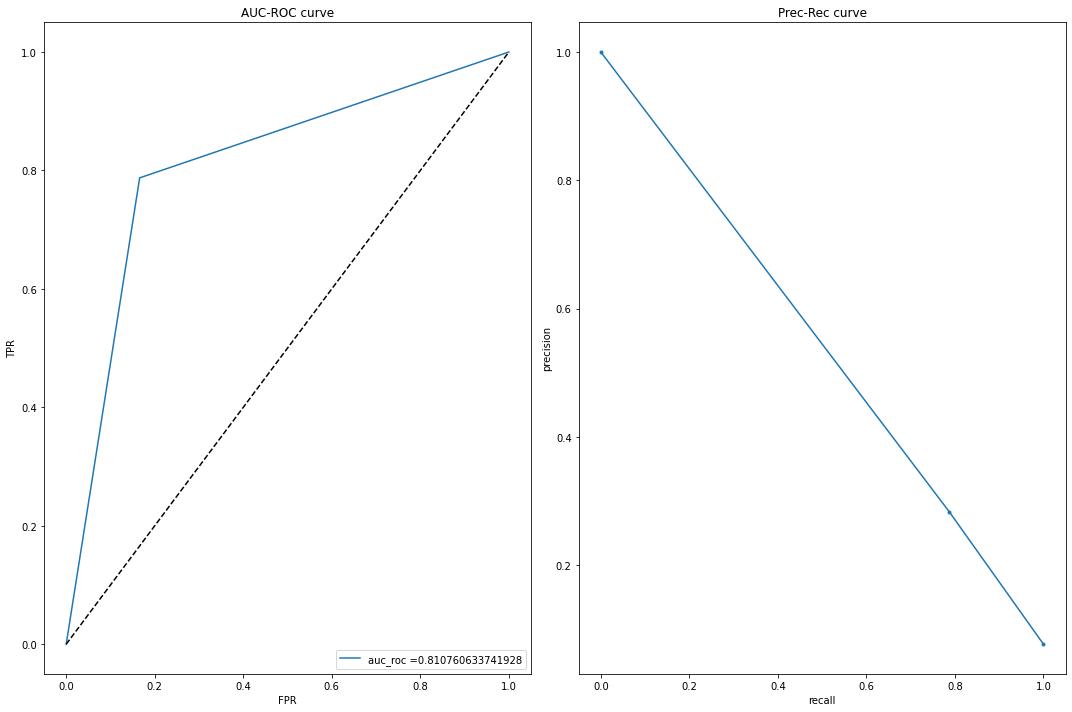

,precision,recall,f1,accuracy,auc_roc,confusion_matrix
0,0.28295,0.787482,0.416314,0.830465,0.810761,"[[6890, 1371], [146, 541]]"


In [1294]:
scores = plot_scores( model, X_test)
results = pd.DataFrame(scores, columns = [ 'precision', 'recall', 'f1','accuracy',
                                                   'auc_roc', 'confusion_matrix'])
results

In [1295]:
y_pred = model.predict(X_test)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2), "Specificity: ", round(specificity, 2))

Sensitivity:  0.79 Specificity:  0.83


In [1296]:
## Extract coefficents and intercept
logistic_model = model.best_estimator_.named_steps['logistic']
intercept = logistic_model.intercept_
print(intercept)

[-1.78913782]


In [1297]:
coef_dict = {'features':less_correlated_features,'coeff':logistic_model.coef_*100}
cdf = pd.DataFrame(data={'features':coef_dict['features'],'coeff':coef_dict['coeff'].tolist()[0]})

In [1298]:
cdf.sort_values('coeff',ascending=False)

,features,coeff
3,sachet_2g_action_phase,46.080166
36,loc_og_mou_good_phase_avg,45.805655
12,total_rech_amt_good_phase_avg,39.224682
20,avg_rech_amt_data_6_7_8_change,17.159832
43,arpu_2g_6,16.557536
38,onnet_mou_good_phase_avg,14.724893
1,sachet_3g_action_phase,11.741837
33,count_rech_3g_action_phase,11.320504
8,ic_others_action_phase,8.879064
30,last_day_rch_amt_6,8.336098


# Recommendations

### 1.) Better packs and offers on data recharges(2g/3g) should be provided
### 2.) Better offers on roaming packs for STD/ISD